<a href="https://colab.research.google.com/github/RohanDubeySF/Training/blob/master/Evaluation/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start

In [782]:
import pandas as pd
import numpy as np


In [783]:
pd.set_option('display.max_columns',50)

In [784]:
data=pd.read_csv('https://raw.githubusercontent.com/RohanDubeySF/Training/refs/heads/master/Evaluation/diamonds%20(cleaned).csv')
data.sample(5)

Shape        Cut Color Clarity  Carat Weight  Length/Width Ratio  \
3809     Heart        NaN     E    VVS2          1.01                1.22   
3571   Radiant        NaN     E     VS1          1.05                1.25   
2723   Emerald        NaN     H     VS2          1.00                1.30   
5892     Round  Very Good     H    VVS2          1.00                1.01   
4069  Marquise        NaN     D    VVS2          1.01                1.98   

      Depth %  Table %     Polish   Symmetry                   Girdle  \
3809     53.8     56.0  Very Good       Good  Thin to Extremely Thick   
3571     67.0     62.0  Excellent  Excellent                   Medium   
2723     72.4     68.0  Excellent  Excellent                    Thick   
5892     64.6     57.0  Excellent  Very Good  Slightly Thick to Thick   
4069     62.8     60.0  Excellent  Very Good     Medium to Very Thick   

           Culet  Length  Width  Height  Price           Type Fluorescence  
3809  Very Small    6.09   7.40    3.98   4410            GIA       Medium  
3571     Pointed    6.69   5.36    3.59   1040  IGI Lab-Grown          NaN  
2723         NaN    6.18   4.76    3.44   2300            GIA          NaN  
5892         NaN    6.15   6.22    4.00   3810            GIA          NaN  
4069         NaN   10.22   5.16    3.24   6300            GIA       Medium

In [785]:
data.head()

Shape    Cut Color Clarity  Carat Weight  Length/Width Ratio  \
0  Cushion Modified  Ideal     F    VVS2          1.84                1.02   
1              Pear    NaN     E     VS1          1.20                1.65   
2              Oval    NaN     E     VS1          1.19                1.41   
3             Heart    NaN     D      IF          1.00                1.18   
4           Radiant    NaN     H     VS1          1.01                1.35   

   Depth %  Table %     Polish   Symmetry                        Girdle Culet  \
0     65.8     59.0  Excellent  Very Good               Medium to Thick   NaN   
1     62.5     58.0  Very Good  Very Good               Medium to Thick   NaN   
2     63.1     63.0  Very Good  Very Good               Medium to Thick   NaN   
3     61.7     58.0  Excellent  Excellent  Slightly Thick to Very Thick   NaN   
4     69.4     66.0  Excellent  Very Good                         Thick   NaN   

   Length  Width  Height  Price           Type Fluorescence  
0    7.09   6.95    4.57   2640  GIA Lab-Grown          NaN  
1    9.64   5.86    3.66   1070  GIA Lab-Grown          NaN  
2    8.44   6.00    3.79   1070  GIA Lab-Grown          NaN  
3    5.85   6.89    4.25   7110            GIA        Faint  
4    6.80   5.05    3.50   3050            GIA          NaN

In [786]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type  

In [787]:
data.isnull().mean()*100


Shape                  0.077101
Cut                   66.353123
Color                  0.077101
Clarity                0.077101
Carat Weight           0.077101
Length/Width Ratio     0.077101
Depth %                0.107941
Table %                0.262143
Polish                 0.308404
Symmetry               0.308404
Girdle                 0.339244
Culet                 70.840401
Length                 0.308404
Width                  0.308404
Height                 0.308404
Price                  0.000000
Type                   0.000000
Fluorescence          81.171935
dtype: float64

In [788]:
from sklearn.preprocessing import OrdinalEncoder
le=OrdinalEncoder()

In [789]:
Fluoro=le.fit_transform(data[['Fluorescence','Cut','Culet']])
Fluoro

array([[nan,  2., nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [nan,  2., nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [790]:
Fluoro=pd.DataFrame(Fluoro,columns=['Fluorescence','Cut','Culet'])
Fluoro

Fluorescence  Cut  Culet
0              NaN  2.0    NaN
1              NaN  NaN    NaN
2              NaN  NaN    NaN
3              0.0  NaN    NaN
4              NaN  NaN    NaN
...            ...  ...    ...
6480           1.0  NaN    NaN
6481           2.0  NaN    NaN
6482           NaN  2.0    NaN
6483           NaN  NaN    NaN
6484           NaN  NaN    NaN

[6485 rows x 3 columns]

In [791]:
Fluoro=pd.concat((Fluoro,data['Price']),axis=1)
Fluoro

Fluorescence  Cut  Culet  Price
0              NaN  2.0    NaN   2640
1              NaN  NaN    NaN   1070
2              NaN  NaN    NaN   1070
3              0.0  NaN    NaN   7110
4              NaN  NaN    NaN   3050
...            ...  ...    ...    ...
6480           1.0  NaN    NaN   3760
6481           2.0  NaN    NaN   4710
6482           NaN  2.0    NaN   3270
6483           NaN  NaN    NaN   1050
6484           NaN  NaN    NaN   2870

[6485 rows x 4 columns]

In [792]:
Fluoro.corr()

Fluorescence       Cut     Culet     Price
Fluorescence      1.000000 -0.023836 -0.313442 -0.078120
Cut              -0.023836  1.000000  0.171555  0.048016
Culet            -0.313442  0.171555  1.000000  0.418989
Price            -0.078120  0.048016  0.418989  1.000000

In [793]:
import seaborn as sns


<Axes: >

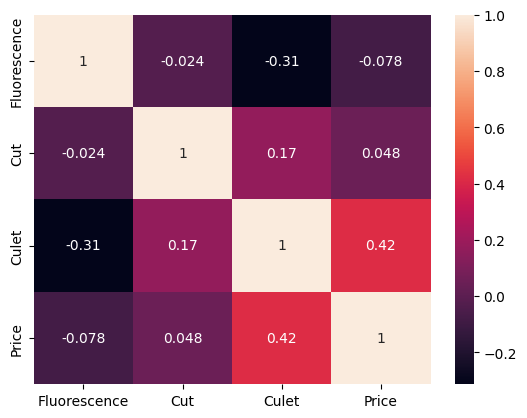

In [794]:
sns.heatmap(Fluoro.corr(),annot=True)

In [795]:
data.columns


Index(['Shape', 'Cut', 'Color', 'Clarity', 'Carat Weight',
       'Length/Width Ratio', 'Depth %', 'Table %', 'Polish', 'Symmetry',
       'Girdle', 'Culet', 'Length', 'Width', 'Height', 'Price', 'Type',
       'Fluorescence'],
      dtype='object')

In [796]:
data[[ 'Carat Weight', 'Length/Width Ratio','Depth %', 'Table %', 'Length', 'Width','Height', 'Price']].corr()

Carat Weight  Length/Width Ratio   Depth %   Table %  \
Carat Weight            1.000000           -0.214103 -0.243091 -0.163627   
Length/Width Ratio     -0.214103            1.000000 -0.276464 -0.257453   
Depth %                -0.243091           -0.276464  1.000000  0.685472   
Table %                -0.163627           -0.257453  0.685472  1.000000   
Length                  0.225236            0.856331 -0.497853 -0.457089   
Width                   0.820909           -0.421054 -0.514722 -0.352839   
Height                  0.834541           -0.613154 -0.134651 -0.112815   
Price                   0.368740            0.151824 -0.183591 -0.098264   

                      Length     Width    Height     Price  
Carat Weight        0.225236  0.820909  0.834541  0.368740  
Length/Width Ratio  0.856331 -0.421054 -0.613154  0.151824  
Depth %            -0.497853 -0.514722 -0.134651 -0.183591  
Table %            -0.457089 -0.352839 -0.112815 -0.098264  
Length              1.000000  0.015194 -0.201180  0.314879  
Width               0.015194  1.000000  0.915727  0.261252  
Height             -0.201180  0.915727  1.000000  0.217995  
Price               0.314879  0.261252  0.217995  1.000000

<Axes: >

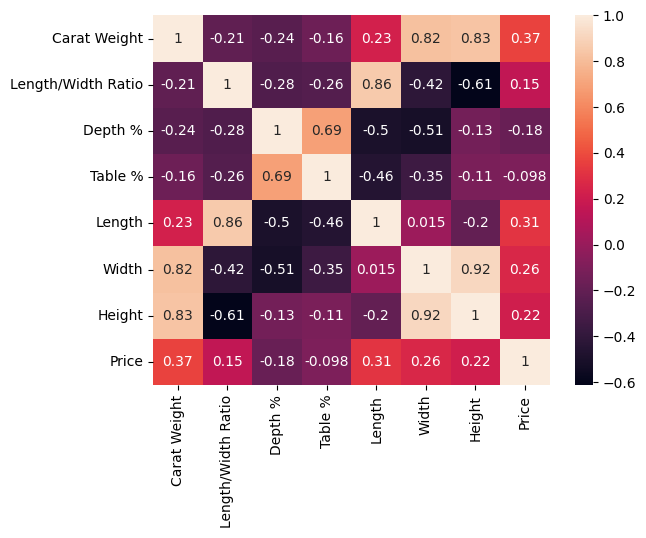

In [797]:
sns.heatmap(data[[ 'Carat Weight', 'Length/Width Ratio','Depth %', 'Table %', 'Length', 'Width','Height', 'Price']].corr(),annot=True)

In [798]:
from scipy.stats import chi2_contingency

In [799]:
def chi(data,col1,col2):
  contingency_table=pd.crosstab(data[col1],data[col2])
  chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
  print(f'{col1} vs {col2}')
  print(f"Chi-Square Statistic: {chi2_stat}")
  print(f"P-Value: {p_value}")
  print(f"Degrees of Freedom: {dof}")

In [800]:
data.columns

Index(['Shape', 'Cut', 'Color', 'Clarity', 'Carat Weight',
       'Length/Width Ratio', 'Depth %', 'Table %', 'Polish', 'Symmetry',
       'Girdle', 'Culet', 'Length', 'Width', 'Height', 'Price', 'Type',
       'Fluorescence'],
      dtype='object')

In [801]:

chi(data,'Shape','Clarity')

Shape vs Clarity
Chi-Square Statistic: 948.278814721204
P-Value: 3.4309875382772733e-166
Degrees of Freedom: 50


In [802]:
data.Cut.value_counts() , data.Cut.value_counts().sum() , data.Cut.isnull().sum()

(Cut
 Ideal        1310
 Excellent     606
 Very Good     258
 Astor           8
 Name: count, dtype: int64,
 2182,
 4303)

In [803]:
data.Culet.value_counts() , data.Culet.value_counts().sum() , data.Culet.isnull().sum()

(Culet
 Pointed       1861
 Very Small      18
 Small           10
 Medium           1
 Very Large       1
 Name: count, dtype: int64,
 1891,
 4594)

In [804]:
data.Fluorescence.value_counts() , data.Fluorescence.value_counts().sum() , data.Fluorescence.isnull().sum()

(Fluorescence
 Faint     695
 Medium    311
 Strong    215
 Name: count, dtype: int64,
 1221,
 5264)

In [805]:
data.drop(['Fluorescence','Culet','Cut'],axis=1,inplace=True)
data

Shape Color Clarity  Carat Weight  Length/Width Ratio  \
0     Cushion Modified     F    VVS2          1.84                1.02   
1                 Pear     E     VS1          1.20                1.65   
2                 Oval     E     VS1          1.19                1.41   
3                Heart     D      IF          1.00                1.18   
4              Radiant     H     VS1          1.01                1.35   
...                ...   ...     ...           ...                 ...   
6480              Pear     F     VS2          1.02                1.54   
6481             Heart     E    VVS2          1.00                1.16   
6482          Princess     G    VVS1          1.03                1.01   
6483           Radiant     E     VS1          1.06                1.43   
6484           Emerald     H    VVS1          1.00                1.36   

      Depth %  Table %     Polish   Symmetry                        Girdle  \
0        65.8     59.0  Excellent  Very Good               Medium to Thick   
1        62.5     58.0  Very Good  Very Good               Medium to Thick   
2        63.1     63.0  Very Good  Very Good               Medium to Thick   
3        61.7     58.0  Excellent  Excellent  Slightly Thick to Very Thick   
4        69.4     66.0  Excellent  Very Good                         Thick   
...       ...      ...        ...        ...                           ...   
6480     62.9     63.0  Excellent  Very Good           Thick to Very Thick   
6481     58.3     59.0  Excellent  Excellent  Slightly Thick to Very Thick   
6482     72.6     71.0  Excellent  Excellent      Medium to Slightly Thick   
6483     67.8     62.0  Excellent  Excellent       Slightly Thick to Thick   
6484     68.4     66.0  Excellent  Excellent       Slightly Thick to Thick   

      Length  Width  Height  Price           Type  
0       7.09   6.95    4.57   2640  GIA Lab-Grown  
1       9.64   5.86    3.66   1070  GIA Lab-Grown  
2       8.44   6.00    3.79   1070  GIA Lab-Grown  
3       5.85   6.89    4.25   7110            GIA  
4       6.80   5.05    3.50   3050            GIA  
...      ...    ...     ...    ...            ...  
6480    8.60   5.59    3.51   3760            GIA  
6481    6.05   6.99    4.07   4710            GIA  
6482    5.59   5.51    4.00   3270            GIA  
6483    7.24   5.05    3.42   1050  GIA Lab-Grown  
6484    6.51   4.77    3.26   2870            GIA  

[6485 rows x 15 columns]

In [806]:
data.isnull().sum()

Shape                  5
Color                  5
Clarity                5
Carat Weight           5
Length/Width Ratio     5
Depth %                7
Table %               17
Polish                20
Symmetry              20
Girdle                22
Length                20
Width                 20
Height                20
Price                  0
Type                   0
dtype: int64

In [807]:
data.isnull().mean()*100

Shape                 0.077101
Color                 0.077101
Clarity               0.077101
Carat Weight          0.077101
Length/Width Ratio    0.077101
Depth %               0.107941
Table %               0.262143
Polish                0.308404
Symmetry              0.308404
Girdle                0.339244
Length                0.308404
Width                 0.308404
Height                0.308404
Price                 0.000000
Type                  0.000000
dtype: float64

In [808]:
data.describe()

Carat Weight  Length/Width Ratio      Depth %      Table %  \
count   6480.000000         6480.000000  6478.000000  6468.000000   
mean       1.235772            1.329548    64.206499    61.828541   
std        0.506647            0.325707     4.773192     4.760197   
min        1.000000            1.000000    46.100000    51.000000   
25%        1.010000            1.020000    61.200000    58.000000   
50%        1.030000            1.270000    63.100000    61.000000   
75%        1.200000            1.510000    67.600000    65.000000   
max        9.380000            2.580000    77.000000    78.000000   

            Length        Width       Height         Price  
count  6465.000000  6465.000000  6465.000000   6485.000000  
mean      7.663595     6.098323     3.885708   3529.391365  
std       1.674665     1.151152     0.599420   3280.439167  
min       5.180000     4.420000     2.670000   1010.000000  
25%       6.330000     5.390000     3.460000   1210.000000  
50%       7.420000     5.640000     3.670000   3320.000000  
75%       8.660000     6.610000     4.100000   4390.000000  
max      15.210000    14.880000     8.170000  39460.000000

In [809]:
data.Length.mode() ,data.Width.mode() , data.Height.mode() ,data['Depth %'].median() ,

(0    7.47
 Name: Length, dtype: float64,
 0    5.52
 Name: Width, dtype: float64,
 0    3.55
 Name: Height, dtype: float64,
 63.1)

In [810]:
data['Carat Weight'].value_counts().index[0]

1.0

In [811]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to print Distribution Graph and box plot

In [812]:
def out_check(data,col):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.kdeplot(data[col])
  plt.subplot(1,2,2)
  sns.boxplot(data[col],orient='h')

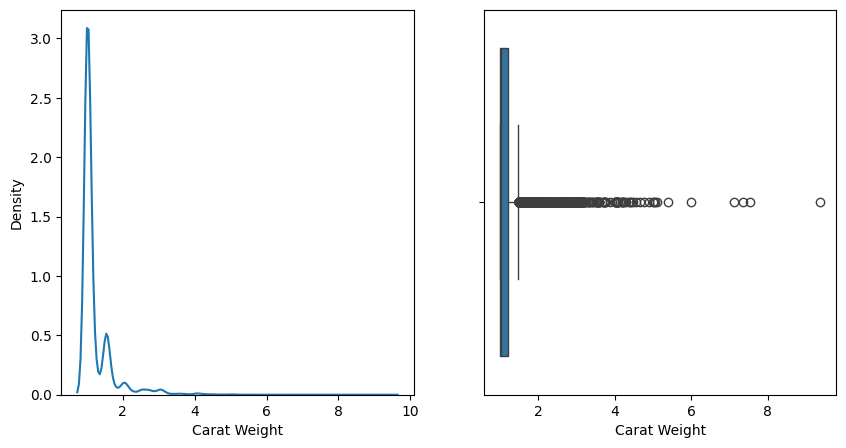

In [813]:
out_check(data,'Carat Weight')

In [814]:
num_cols=[cols for cols in data.columns[-3::-1] if np.dtype(data[cols]) in ['int64','float64']]
num_cols

['Height',
 'Width',
 'Length',
 'Table %',
 'Depth %',
 'Length/Width Ratio',
 'Carat Weight']

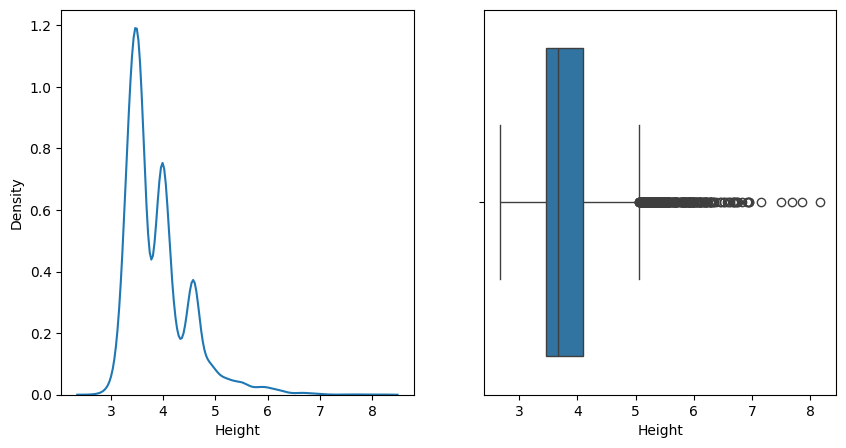

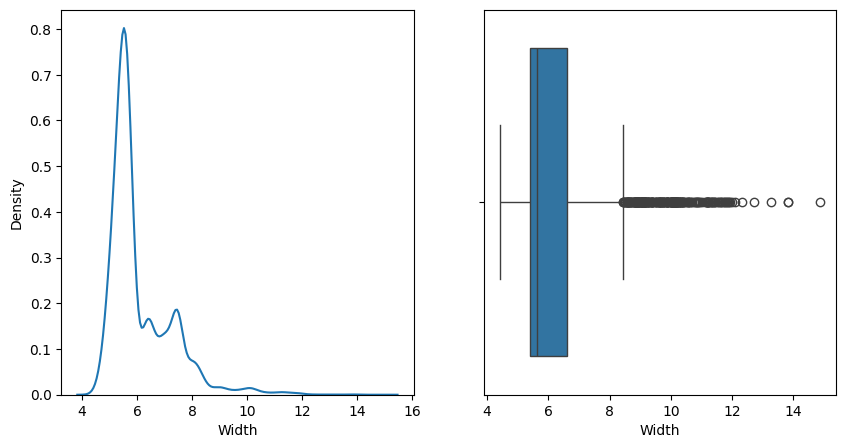

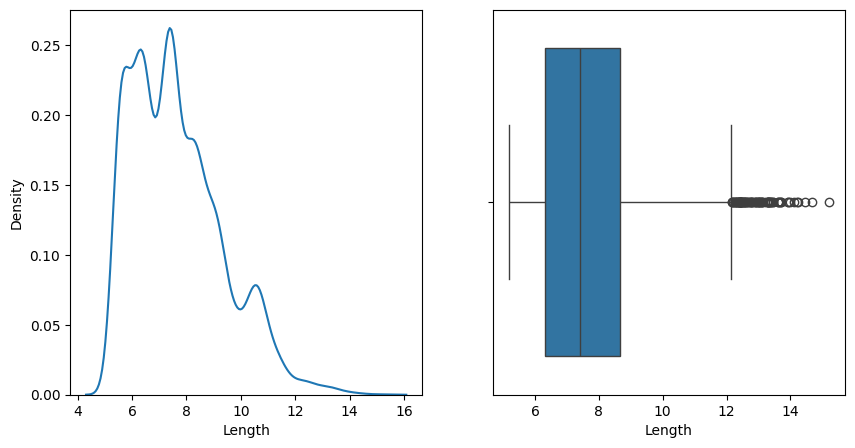

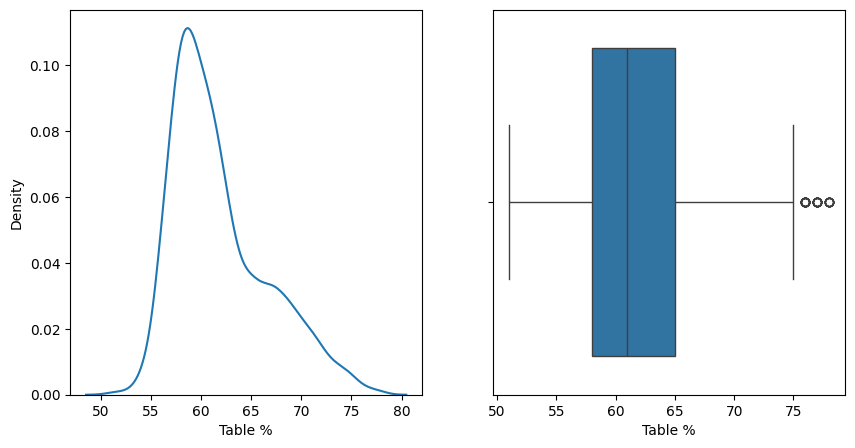

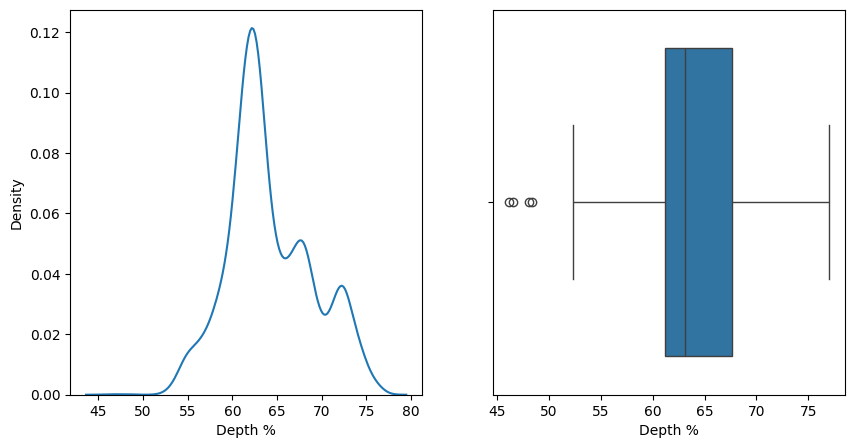

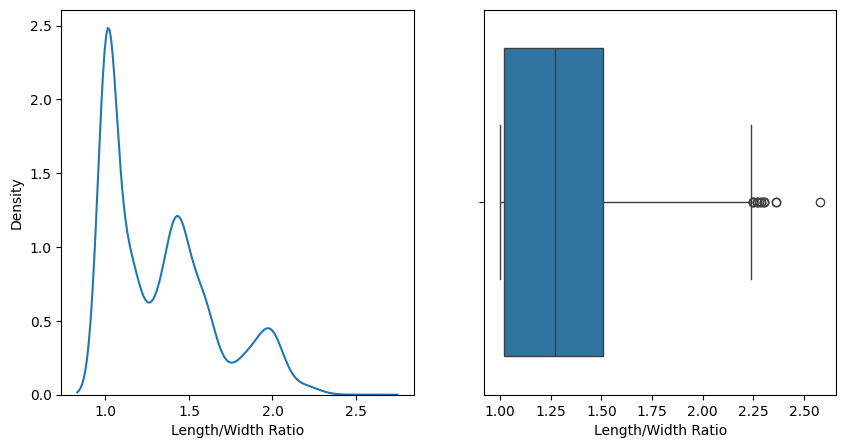

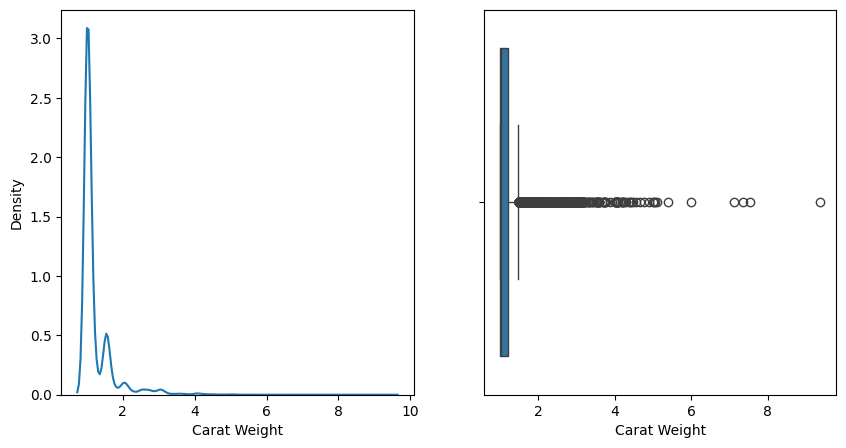

In [815]:
for col in num_cols:
  out_check(data,col)

<Axes: xlabel='Length', ylabel='Density'>

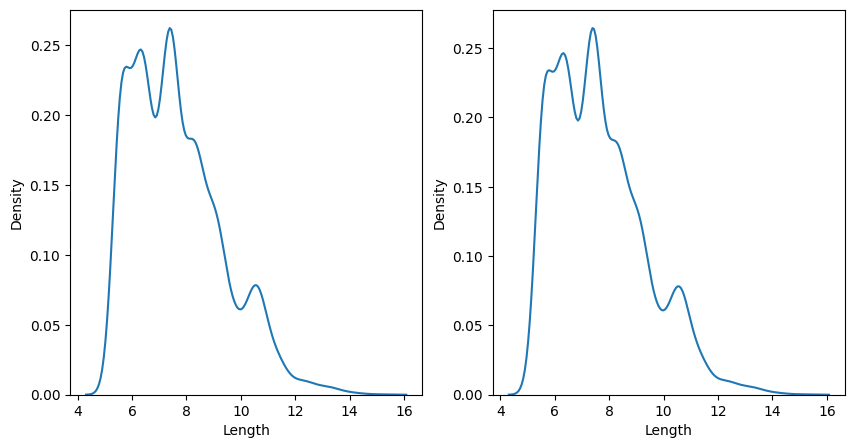

In [816]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(data.Length) ,
plt.subplot(1,2,2)
sns.kdeplot(data.Length.fillna(data.Length.mean()))

<Axes: xlabel='Width', ylabel='Density'>

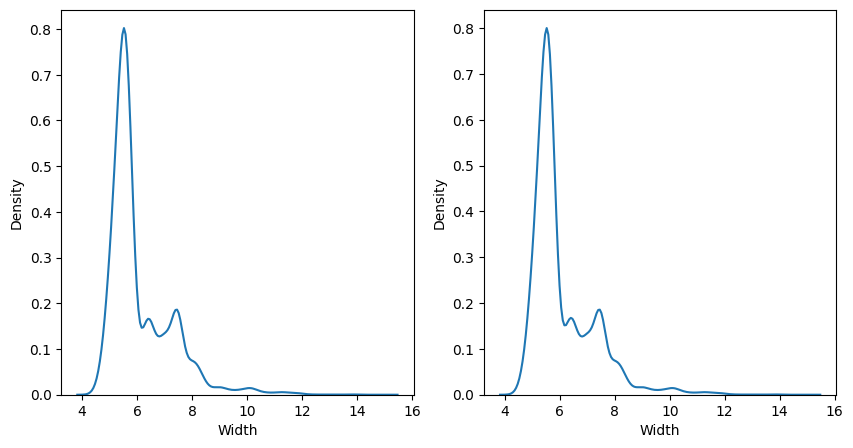

In [817]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(data.Width) ,
plt.subplot(1,2,2)
sns.kdeplot(data.Width.fillna(data.Width.mean()))

<Axes: xlabel='Height', ylabel='Density'>

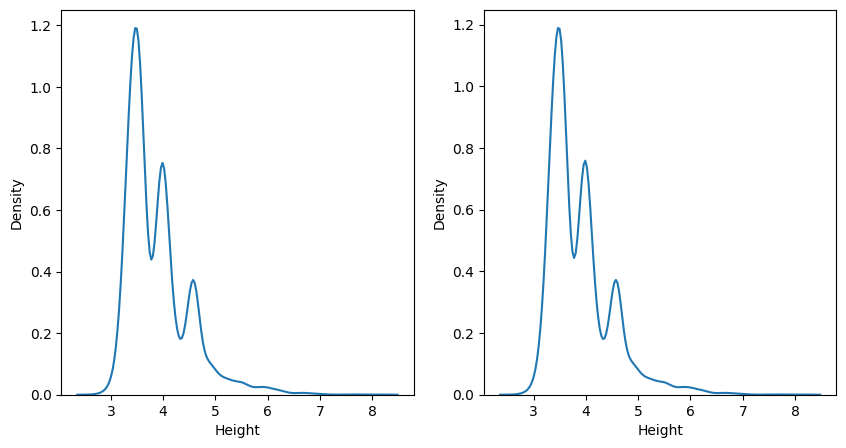

In [818]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(data.Height)
plt.subplot(1,2,2)
sns.kdeplot(data.Height.fillna(data.Height.mean()))

# Imputing Missing Numerical Values with median


In [819]:
def medianfill(data,col):
  data[col]=data[col].fillna(data[col].median())

In [820]:
for col in num_cols:
  medianfill(data,col)

In [821]:
data.isnull().mean()*100

Shape                 0.077101
Color                 0.077101
Clarity               0.077101
Carat Weight          0.000000
Length/Width Ratio    0.000000
Depth %               0.000000
Table %               0.000000
Polish                0.308404
Symmetry              0.308404
Girdle                0.339244
Length                0.000000
Width                 0.000000
Height                0.000000
Price                 0.000000
Type                  0.000000
dtype: float64

In [822]:
data.isnull().sum()

Shape                  5
Color                  5
Clarity                5
Carat Weight           0
Length/Width Ratio     0
Depth %                0
Table %                0
Polish                20
Symmetry              20
Girdle                22
Length                 0
Width                  0
Height                 0
Price                  0
Type                   0
dtype: int64

# Imputing missing Categorical values with mode

In [823]:
nul_col=[col for col in data.columns if data[col].isnull().sum()>0]
nul_col

['Shape', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Girdle']

In [824]:
data.Girdle.value_counts()

Girdle
Medium to Slightly Thick             1713
Slightly Thick to Thick               986
Medium to Thick                       672
Thick to Very Thick                   585
Medium                                582
Slightly Thick to Very Thick          526
Medium to Very Thick                  229
Slightly Thick                        224
Thick                                 199
Thin to Medium                        165
Thin to Slightly Thick                120
Thin to Thick                          95
Very Thick                             85
Thick to Extremely Thick               58
Very Thick to Extremely Thick          46
Thin to Very Thick                     41
Slightly Thick to Extremely Thick      38
Medium to Extremely Thick              30
Thin                                   16
Very Thin to Very Thick                14
Thin to Extremely Thick                13
Very Thin to Thick                      8
Extremely Thick                         8
Very Thin to Slightly Thick             4
Extremely Thin to Medium                2
Slightly Thick to Slightly Thick        1
Very Thin to Extremely Thick            1
Extremely Thin to Extremely Thick       1
Extremely Thin to Slightly Thick        1
Name: count, dtype: int64

In [825]:
data.Girdle=data.Girdle.fillna(data.Girdle.value_counts().index[0])

In [826]:
data.Symmetry.value_counts()

Symmetry
Excellent    4551
Very Good    1790
Good          124
Name: count, dtype: int64

In [827]:
data.Symmetry=data.Symmetry.fillna(data.Symmetry.value_counts().index[0])

In [828]:
data.Symmetry.value_counts()

Symmetry
Excellent    4571
Very Good    1790
Good          124
Name: count, dtype: int64

In [829]:
data.Symmetry.isnull().sum()

0

In [830]:
data.Polish.value_counts()

Polish
Excellent    5939
Very Good     492
Good           34
Name: count, dtype: int64

In [831]:
data.Polish=data.Polish.fillna(data.Polish.value_counts().index[0])

In [832]:
data.Polish.isnull().sum()

0

In [833]:
data.Polish.value_counts()

Polish
Excellent    5959
Very Good     492
Good           34
Name: count, dtype: int64

In [834]:
data.isnull().sum()

Shape                 5
Color                 5
Clarity               5
Carat Weight          0
Length/Width Ratio    0
Depth %               0
Table %               0
Polish                0
Symmetry              0
Girdle                0
Length                0
Width                 0
Height                0
Price                 0
Type                  0
dtype: int64

In [835]:
nul_col=[col for col in data.columns if data[col].isnull().sum()>0]
nul_col

['Shape', 'Color', 'Clarity']

In [836]:
data.Shape.value_counts()

Shape
Round               888
Pear                840
Marquise            835
Princess            833
Oval                828
Heart               827
Radiant             801
Cushion Modified    365
Emerald             137
Cushion              91
Square Radiant       35
Name: count, dtype: int64

In [837]:
data.Shape.mode()

0    Round
Name: Shape, dtype: object

In [838]:
data.Shape=data.Shape.fillna(data.Shape.mode())

In [839]:
data.Shape.isnull().sum()

5

In [840]:
data.Shape.value_counts().index[0]

'Round'

In [841]:
data.Shape=data.Shape.fillna(data.Shape.value_counts().index[0])

In [842]:
data.Shape.unique()

array(['Cushion Modified', 'Pear', 'Oval', 'Heart', 'Radiant', 'Marquise',
       'Princess', 'Round', 'Cushion', 'Emerald', 'Square Radiant'],
      dtype=object)

In [843]:
data.Color.value_counts()

Color
E    1884
D    1772
H    1117
F     969
G     738
Name: count, dtype: int64

In [844]:
data.Color=data.Color.fillna(data.Color.value_counts().index[0])

In [845]:
data.Clarity.value_counts()

Clarity
VS1     3337
VS2     1433
VVS2    1061
VVS1     480
IF       163
FL         6
Name: count, dtype: int64

In [846]:
data.Clarity=data.Clarity.fillna(data.Clarity.value_counts().index[0])

In [847]:
data.isnull().sum().sum()

0

In [848]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6485 non-null   object 
 1   Color               6485 non-null   object 
 2   Clarity             6485 non-null   object 
 3   Carat Weight        6485 non-null   float64
 4   Length/Width Ratio  6485 non-null   float64
 5   Depth %             6485 non-null   float64
 6   Table %             6485 non-null   float64
 7   Polish              6485 non-null   object 
 8   Symmetry            6485 non-null   object 
 9   Girdle              6485 non-null   object 
 10  Length              6485 non-null   float64
 11  Width               6485 non-null   float64
 12  Height              6485 non-null   float64
 13  Price               6485 non-null   int64  
 14  Type                6485 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 760.1+

In [849]:
data.sample(10)

Shape Color Clarity  Carat Weight  Length/Width Ratio  Depth %  \
4452  Princess     F    VVS2          1.00                1.01     72.1   
182       Pear     F     VS2          1.01                1.53     63.3   
1437   Radiant     E     VS1          1.28                1.25     67.1   
493   Marquise     D     VS1          2.01                1.92     62.2   
3096      Pear     F     VS1          1.09                1.58     59.9   
1830  Princess     G    VVS1          1.03                1.01     72.5   
4030     Heart     E     VS2          1.50                1.13     55.0   
6257      Pear     G     VS1          1.01                1.52     60.4   
48    Marquise     D    VVS2          1.01                1.83     59.0   
4289  Marquise     E    VVS2          1.05                2.09     59.3   

      Table %     Polish   Symmetry                    Girdle  Length  Width  \
4452     67.0  Excellent  Excellent            Thin to Medium    5.45   5.42   
182      57.0  Excellent  Excellent   Slightly Thick to Thick    8.66   5.66   
1437     65.0  Very Good  Very Good   Slightly Thick to Thick    7.16   5.72   
493      60.0  Excellent  Very Good       Thick to Very Thick   12.71   6.63   
3096     61.0  Excellent  Excellent  Medium to Slightly Thick    9.17   5.81   
1830     71.0  Excellent  Excellent                     Thick    5.51   5.43   
4030     58.0  Excellent  Excellent      Medium to Very Thick    7.14   8.10   
6257     60.0  Excellent  Very Good           Medium to Thick    8.62   5.68   
48       58.0  Excellent  Very Good      Medium to Very Thick    9.97   5.46   
4289     60.0  Excellent  Excellent  Medium to Slightly Thick   11.00   5.26   

      Height  Price           Type  
4452    3.91   1120  IGI Lab-Grown  
182     3.58   3940            GIA  
1437    3.83   1120  GIA Lab-Grown  
493     4.13  29590            GIA  
3096    3.48   1080  IGI Lab-Grown  
1830    3.94   3450            GIA  
4030    4.46   9160            GIA  
6257    3.43   1790            GIA  
48      3.22   1230  GIA Lab-Grown  
4289    3.12   1500  IGI Lab-Grown

In [850]:
data.columns

Index(['Shape', 'Color', 'Clarity', 'Carat Weight', 'Length/Width Ratio',
       'Depth %', 'Table %', 'Polish', 'Symmetry', 'Girdle', 'Length', 'Width',
       'Height', 'Price', 'Type'],
      dtype='object')

In [851]:
data[ ['Carat Weight','Length/Width Ratio', 'Depth %', 'Table %', 'Length', 'Width', 'Height', 'Price']].corr()

Carat Weight  Length/Width Ratio   Depth %   Table %  \
Carat Weight            1.000000           -0.214029 -0.243027 -0.163395   
Length/Width Ratio     -0.214029            1.000000 -0.276304 -0.257097   
Depth %                -0.243027           -0.276304  1.000000  0.685090   
Table %                -0.163395           -0.257097  0.685090  1.000000   
Length                  0.224314            0.855237 -0.497386 -0.456951   
Width                   0.817567           -0.420409 -0.514003 -0.352533   
Height                  0.831246           -0.612251 -0.134338 -0.112620   
Price                   0.368755            0.151840 -0.183496 -0.098171   

                      Length     Width    Height     Price  
Carat Weight        0.224314  0.817567  0.831246  0.368755  
Length/Width Ratio  0.855237 -0.420409 -0.612251  0.151840  
Depth %            -0.497386 -0.514003 -0.134338 -0.183496  
Table %            -0.456951 -0.352533 -0.112620 -0.098171  
Length              1.000000  0.015368 -0.200972  0.313800  
Width               0.015368  1.000000  0.915762  0.260081  
Height             -0.200972  0.915762  1.000000  0.217006  
Price               0.313800  0.260081  0.217006  1.000000

# Spliting the Data

In [852]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop('Price',axis=1),data['Price'],test_size=0.2,random_state=69)
x_train.shape

(5188, 14)

# Outliers

In [853]:
x_train

Shape Color Clarity  Carat Weight  Length/Width Ratio  \
1825  Cushion Modified     H     VS2          1.00                1.07   
5279              Oval     E     VS1          1.06                1.45   
4693  Cushion Modified     E     VS2          1.01                1.21   
5890          Princess     G     VS1          1.00                1.01   
3047             Heart     D    VVS2          3.03                1.12   
...                ...   ...     ...           ...                 ...   
3633             Round     E     VS1          1.56                1.01   
439            Emerald     G     VS2          1.01                1.36   
1626              Oval     E     VS1          1.10                1.46   
2667              Oval     E     VS1          1.08                1.47   
4041           Radiant     E     VS1          1.00                1.27   

      Depth %  Table %     Polish   Symmetry                        Girdle  \
1825     69.4     62.0  Excellent  Excellent       Slightly Thick to Thick   
5279     63.0     59.0  Excellent  Excellent                Slightly Thick   
4693     72.8     56.0  Excellent  Very Good  Slightly Thick to Very Thick   
5890     73.8     65.0  Excellent  Very Good           Thick to Very Thick   
3047     60.3     58.0  Excellent  Excellent       Slightly Thick to Thick   
...       ...      ...        ...        ...                           ...   
3633     61.1     57.0  Excellent  Excellent                        Medium   
439      68.7     70.0  Excellent  Excellent           Thick to Very Thick   
1626     62.5     59.0  Excellent  Excellent                Thin to Medium   
2667     61.9     62.0  Excellent  Excellent      Medium to Slightly Thick   
4041     70.8     67.0  Excellent  Very Good  Slightly Thick to Very Thick   

      Length  Width  Height           Type  
1825    5.75   5.37    3.72            GIA  
5279    8.26   5.71    3.60  IGI Lab-Grown  
4693    6.20   5.14    3.74            GIA  
5890    5.31   5.28    3.89            GIA  
3047    8.95  10.00    6.03  IGI Lab-Grown  
...      ...    ...     ...            ...  
3633    7.47   7.52    4.58  IGI Lab-Grown  
439     6.52   4.78    3.28            GIA  
1626    8.50   5.84    3.65  IGI Lab-Grown  
2667    8.47   5.78    3.58  IGI Lab-Grown  
4041    6.40   5.04    3.57            GIA  

[5188 rows x 14 columns]

In [854]:
num_cols

['Height',
 'Width',
 'Length',
 'Table %',
 'Depth %',
 'Length/Width Ratio',
 'Carat Weight']

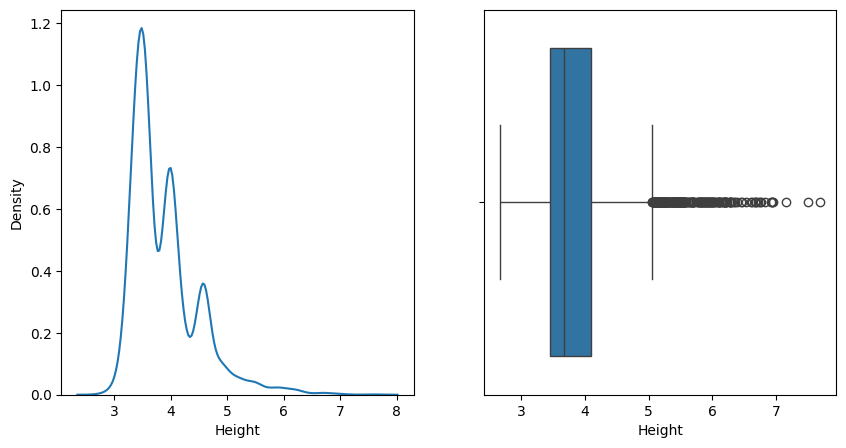

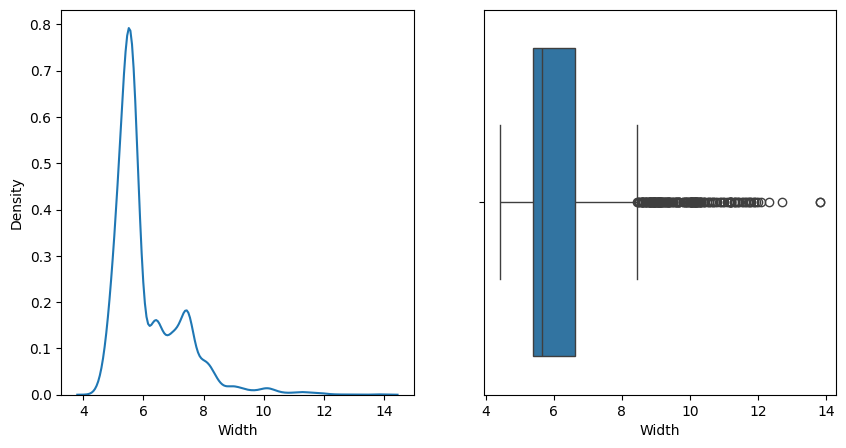

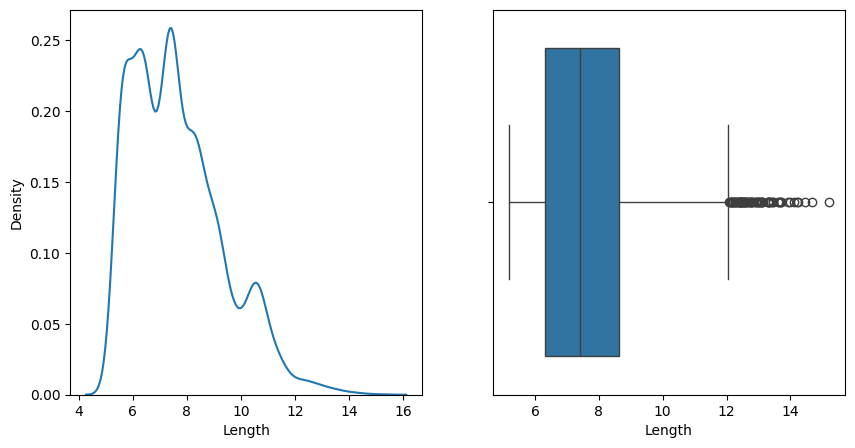

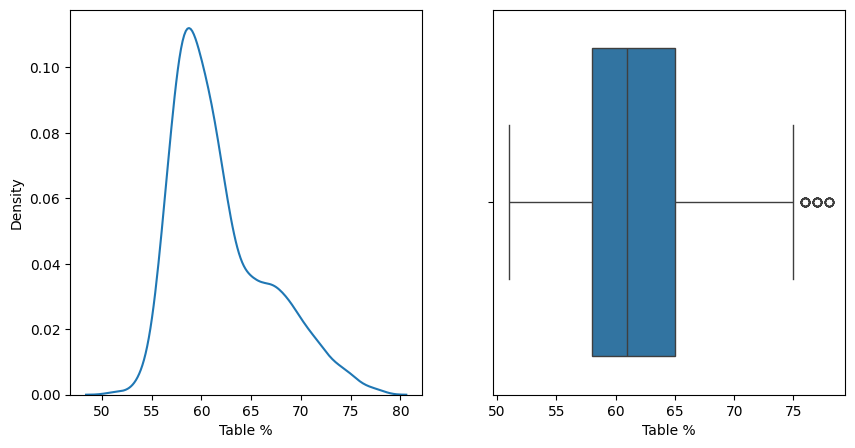

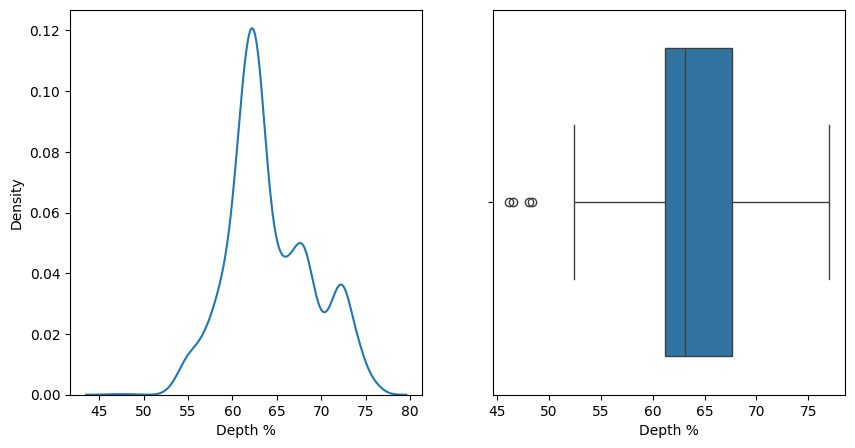

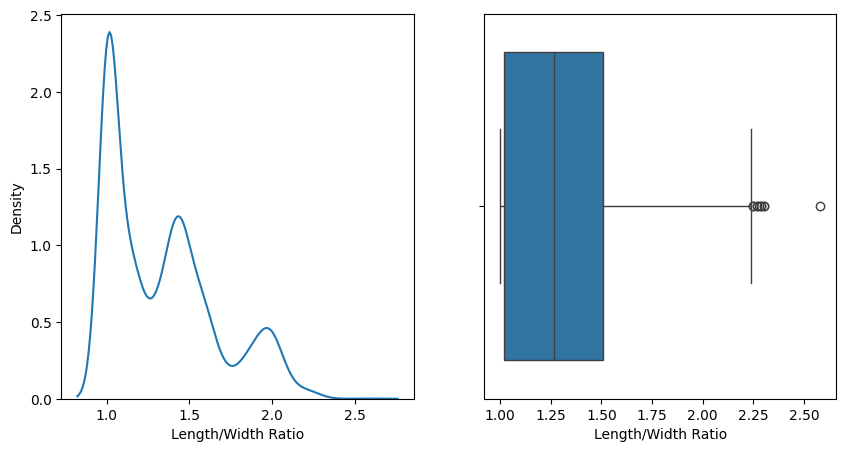

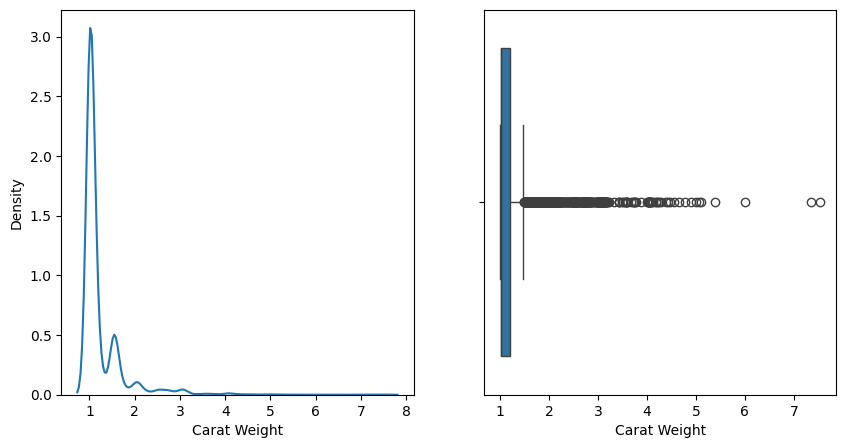

In [855]:
for col in num_cols:
  out_check(x_train,col)

In [856]:
x_train.describe()

Carat Weight  Length/Width Ratio      Depth %      Table %  \
count   5188.000000         5188.000000  5188.000000  5188.000000   
mean       1.235484            1.329794    64.203103    61.844256   
std        0.496502            0.326042     4.776969     4.789529   
min        1.000000            1.000000    46.100000    51.000000   
25%        1.010000            1.020000    61.200000    58.000000   
50%        1.030000            1.265000    63.100000    61.000000   
75%        1.200000            1.510000    67.600000    65.000000   
max        7.540000            2.580000    77.000000    78.000000   

            Length        Width       Height  
count  5188.000000  5188.000000  5188.000000  
mean      7.667267     6.099235     3.886519  
std       1.681901     1.144120     0.597043  
min       5.180000     4.420000     2.670000  
25%       6.330000     5.390000     3.460000  
50%       7.420000     5.640000     3.670000  
75%       8.620000     6.610000     4.100000  
max      15.210000    13.830000     7.690000

### trimmming the outliers to keep in mind of dimensions


In [857]:
  def outlier(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    max=q3+(1.5*iqr)
    min=q1-(1.5*iqr)
    data.drop(data[(data[col]<min) | (data[col]>=max)].index,inplace=True)

In [858]:
def extreme(data,col):
  q1=data[col].quantile(0.25)
  q3=data[col].quantile(0.75)
  iqr=q3-q1
  max=q3+(3*iqr)
  min=q1-(3*iqr)
  data.drop(data[(data[col]<min) | (data[col]>max)].index,inplace=True)

In [859]:
for col in ['Length/Width Ratio','Depth %','Table %','Length','Width','Height']:
  outlier(x_train,col)
  outlier(x_test,col)

In [860]:
extreme(x_train,'Carat Weight')
extreme(x_test,'Carat Weight')

In [861]:
x_train.shape

(4037, 14)

In [862]:
x_test.shape

(991, 14)

In [863]:
ind_train=x_train.index
ind_test=x_test.index
ind_train

Index([1825, 5279, 4693, 5890, 5653, 5557, 2262, 4592,   84, 5149,
       ...
        933, 2136, 1830, 5304, 1033, 4374,  439, 1626, 2667, 4041],
      dtype='int64', length=4037)

In [864]:
y_train.shape

(5188,)

In [865]:
y_train=y_train[ind_train]
y_test=y_test[ind_test]

In [866]:
y_train.shape

(4037,)

In [867]:
x_train.describe()

Carat Weight  Length/Width Ratio      Depth %      Table %  \
count   4037.000000         4037.000000  4037.000000  4037.000000   
mean       1.041476            1.380753    64.909413    62.400297   
std        0.059859            0.316047     4.660429     4.858149   
min        1.000000            1.000000    52.400000    51.000000   
25%        1.000000            1.030000    61.700000    59.000000   
50%        1.010000            1.390000    63.500000    61.000000   
75%        1.060000            1.560000    68.300000    66.000000   
max        1.370000            2.240000    77.000000    75.000000   

            Length        Width       Height  
count  4037.000000  4037.000000  4037.000000  
mean      7.561808     5.639460     3.646428  
std       1.665636     0.545122     0.300300  
min       5.180000     4.420000     2.800000  
25%       6.160000     5.320000     3.420000  
50%       7.290000     5.550000     3.560000  
75%       8.750000     5.740000     3.950000  
max      11.780000     7.910000     4.730000

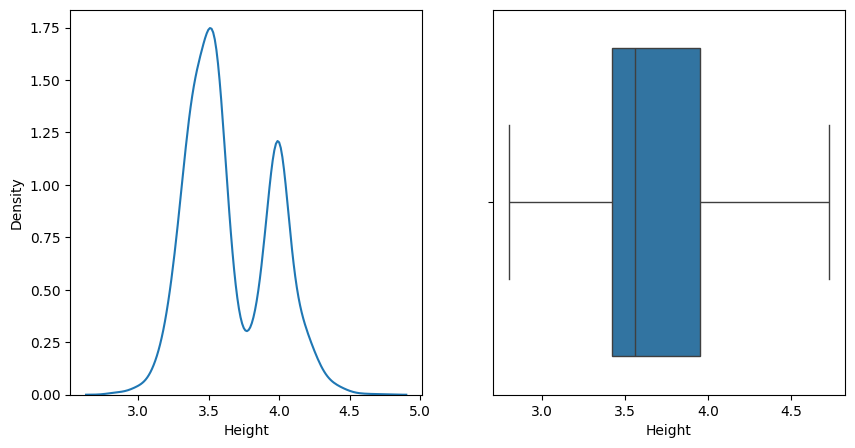

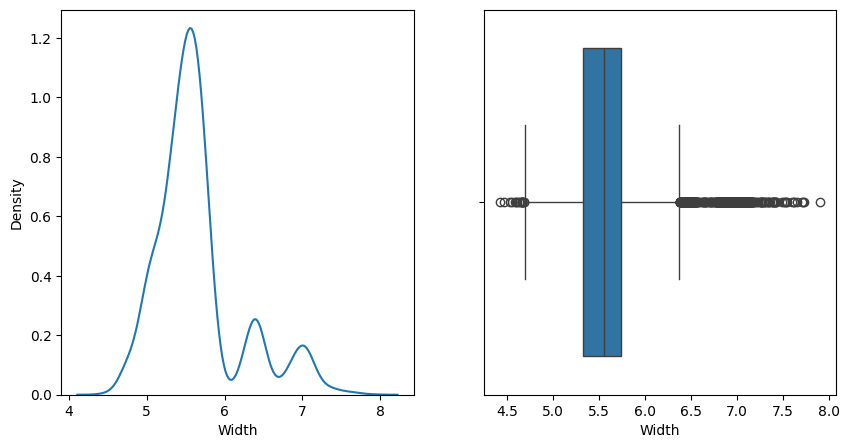

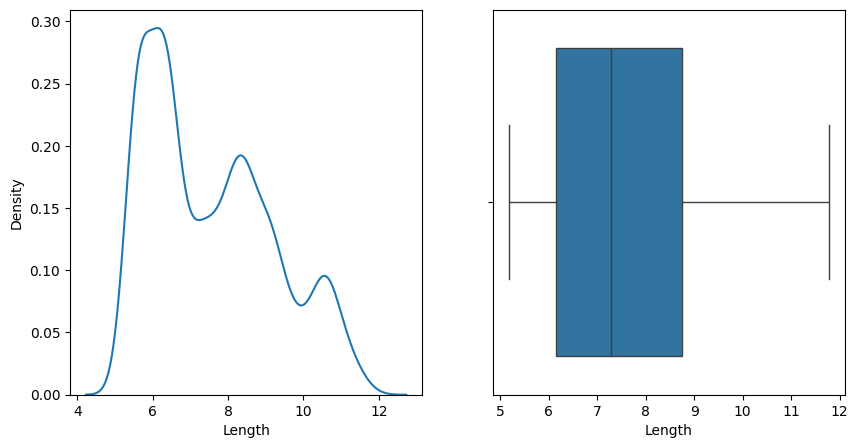

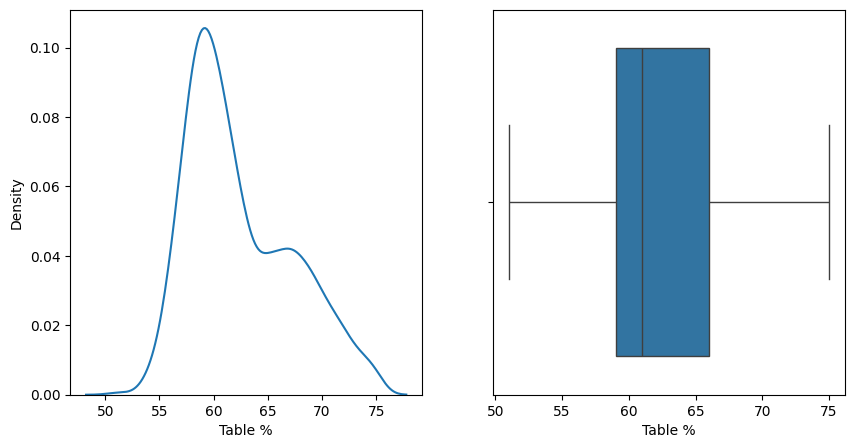

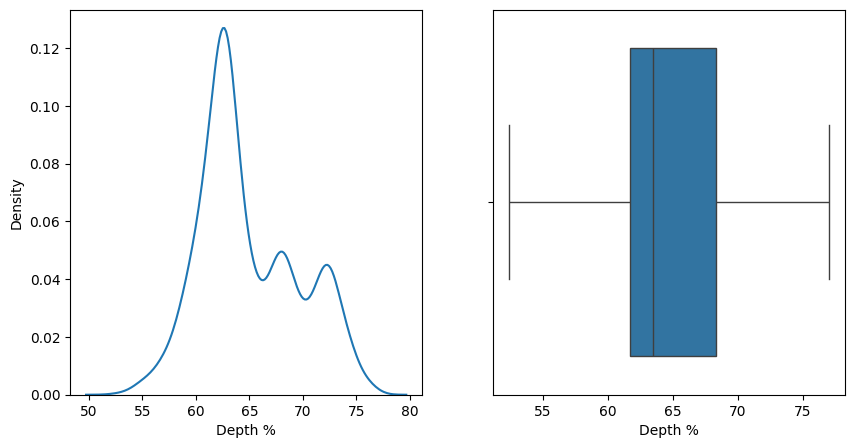

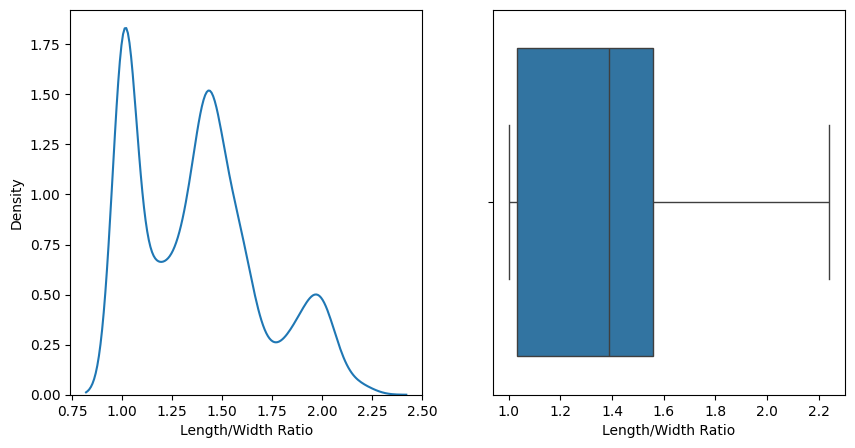

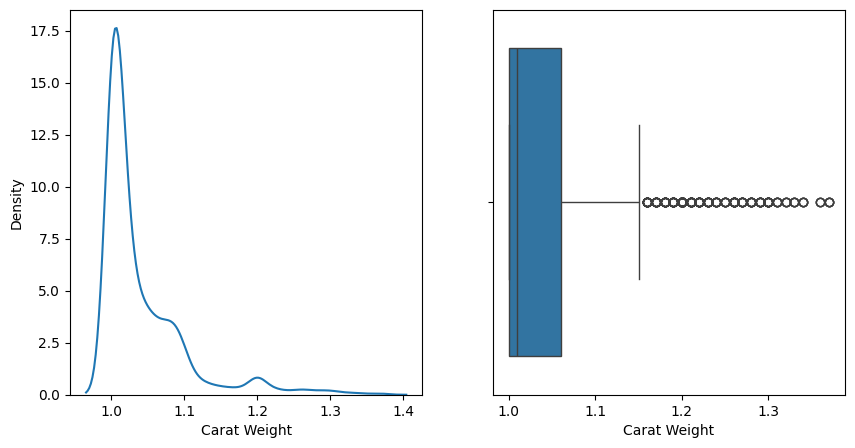

In [868]:
for col in num_cols:
  out_check(x_train,col)

In [869]:
import scipy.stats as stat
import pylab

In [870]:
def skew(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(data[feature],kde=True)
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

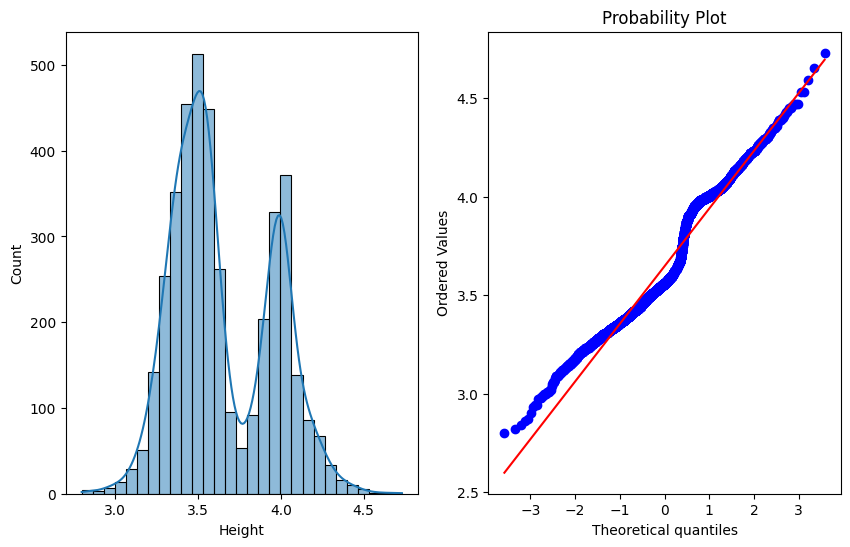

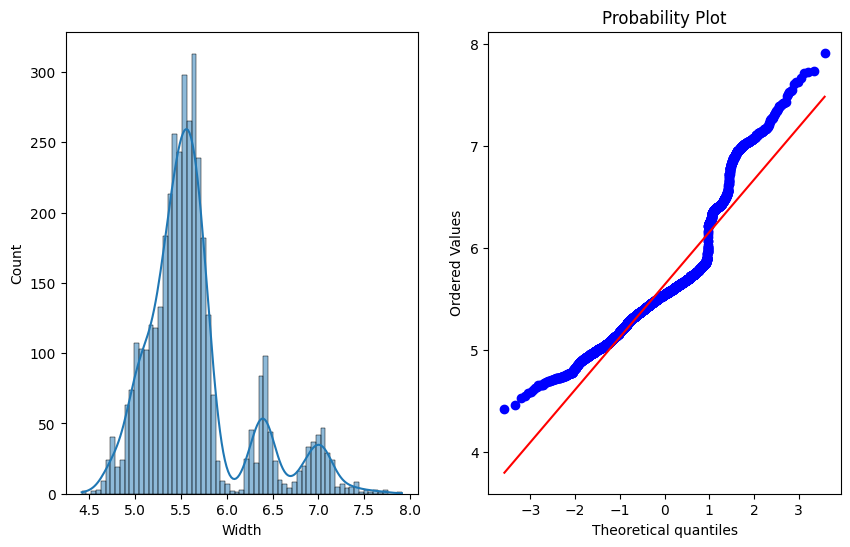

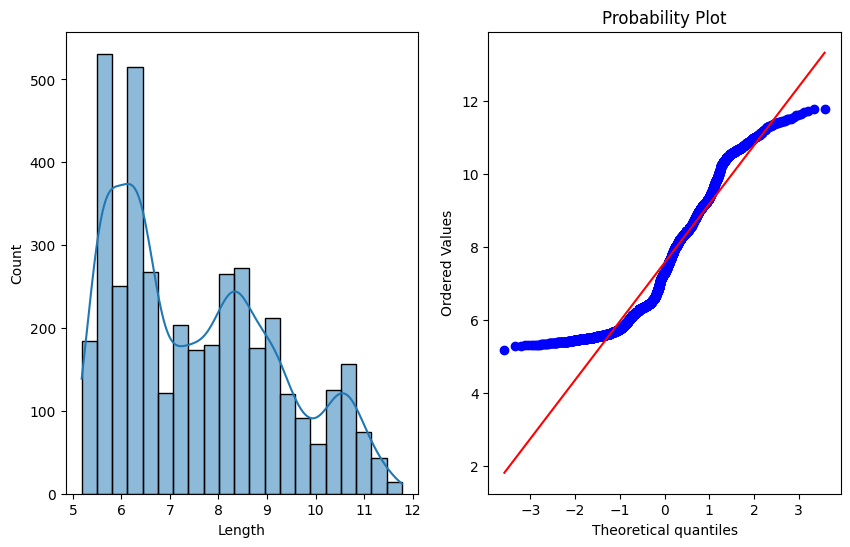

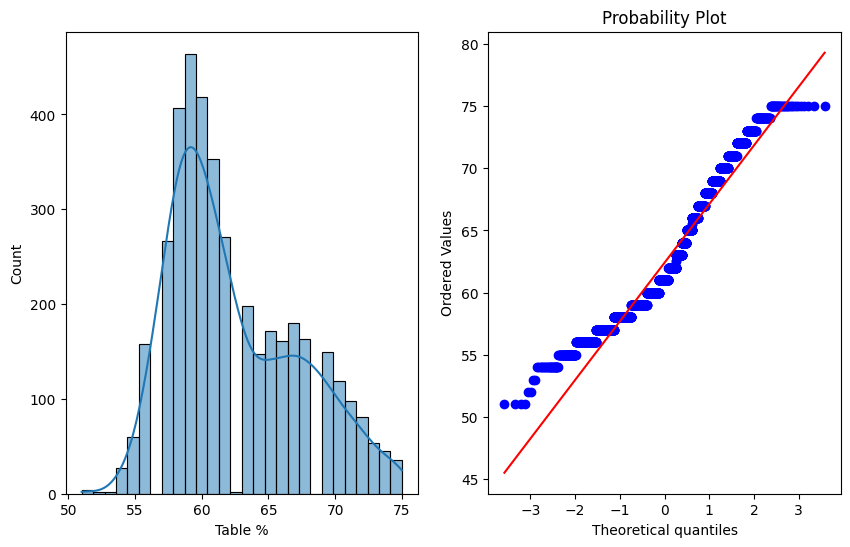

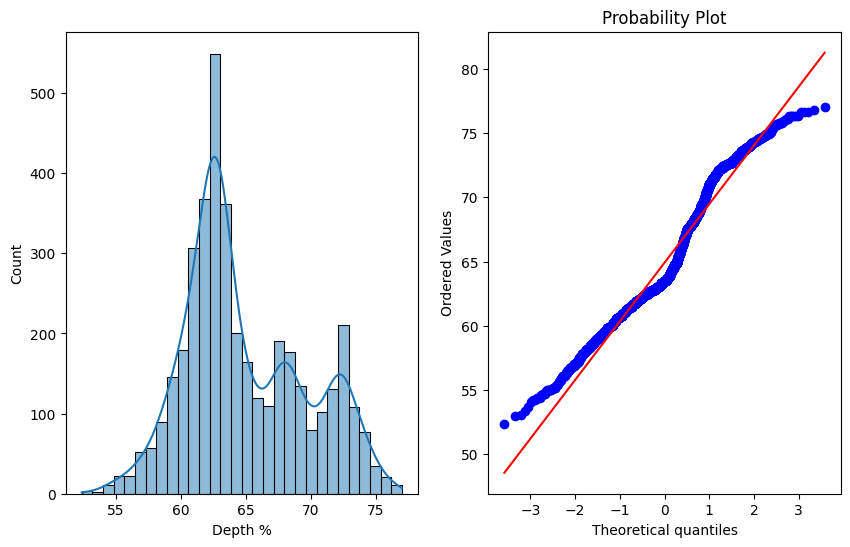

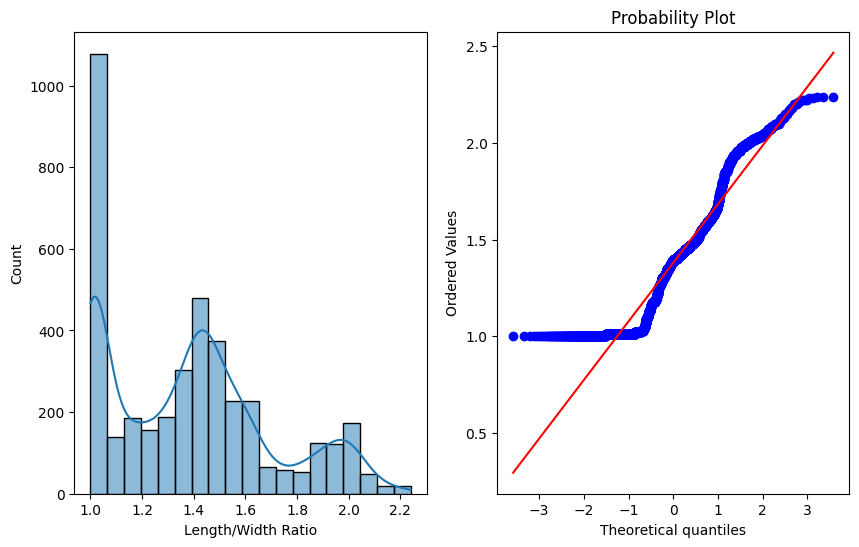

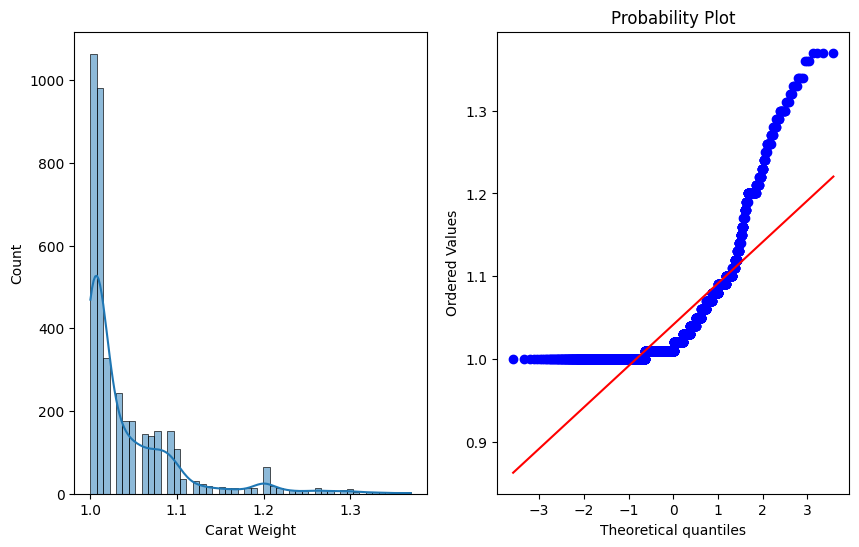

In [871]:
for col in num_cols:
  skew(x_train,col)

# Perform Ordinal Encoding for Ordinal data


In [872]:
data['Symmetry'].unique()

array(['Very Good', 'Excellent', 'Good'], dtype=object)

In [873]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['D', 'E', 'F', 'G', 'H'],['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2'],['Good', 'Very Good','Excellent' ],['Good', 'Very Good','Excellent' ]])

In [874]:
oe.fit(x_train[['Color','Clarity','Polish', 'Symmetry']])

OrdinalEncoder(categories=[['D', 'E', 'F', 'G', 'H'],
                           ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2'],
                           ['Good', 'Very Good', 'Excellent'],
                           ['Good', 'Very Good', 'Excellent']])

In [875]:
  x_train[['Color','Clarity','Polish', 'Symmetry']]=oe.transform(x_train[['Color','Clarity','Polish', 'Symmetry']])
  x_test[['Color','Clarity','Polish', 'Symmetry']]=oe.transform(x_test[['Color','Clarity','Polish', 'Symmetry']])
  x_train

Shape  Color  Clarity  Carat Weight  Length/Width Ratio  \
1825  Cushion Modified    4.0      5.0          1.00                1.07   
5279              Oval    1.0      4.0          1.06                1.45   
4693  Cushion Modified    1.0      5.0          1.01                1.21   
5890          Princess    3.0      4.0          1.00                1.01   
5653           Radiant    3.0      4.0          1.01                1.30   
...                ...    ...      ...           ...                 ...   
4374           Radiant    1.0      5.0          1.01                1.22   
439            Emerald    3.0      5.0          1.01                1.36   
1626              Oval    1.0      4.0          1.10                1.46   
2667              Oval    1.0      4.0          1.08                1.47   
4041           Radiant    1.0      4.0          1.00                1.27   

      Depth %  Table %  Polish  Symmetry                        Girdle  \
1825     69.4     62.0     2.0       2.0       Slightly Thick to Thick   
5279     63.0     59.0     2.0       2.0                Slightly Thick   
4693     72.8     56.0     2.0       1.0  Slightly Thick to Very Thick   
5890     73.8     65.0     2.0       1.0           Thick to Very Thick   
5653     65.9     67.0     2.0       2.0      Medium to Slightly Thick   
...       ...      ...     ...       ...                           ...   
4374     62.8     69.0     1.0       0.0          Medium to Very Thick   
439      68.7     70.0     2.0       2.0           Thick to Very Thick   
1626     62.5     59.0     2.0       2.0                Thin to Medium   
2667     61.9     62.0     2.0       2.0      Medium to Slightly Thick   
4041     70.8     67.0     2.0       1.0  Slightly Thick to Very Thick   

      Length  Width  Height           Type  
1825    5.75   5.37    3.72            GIA  
5279    8.26   5.71    3.60  IGI Lab-Grown  
4693    6.20   5.14    3.74            GIA  
5890    5.31   5.28    3.89            GIA  
5653    6.61   5.07    3.34            GIA  
...      ...    ...     ...            ...  
4374    6.29   5.16    3.24            GIA  
439     6.52   4.78    3.28            GIA  
1626    8.50   5.84    3.65  IGI Lab-Grown  
2667    8.47   5.78    3.58  IGI Lab-Grown  
4041    6.40   5.04    3.57            GIA  

[4037 rows x 14 columns]

In [876]:
x_test

Shape  Color  Clarity  Carat Weight  Length/Width Ratio  Depth %  \
2311  Marquise    2.0      5.0          1.00                1.75     61.6   
3319      Oval    3.0      3.0          1.00                1.35     63.7   
4543      Oval    1.0      4.0          1.08                1.43     62.1   
1616      Oval    0.0      4.0          1.01                1.48     60.5   
636    Radiant    2.0      3.0          1.02                1.43     67.9   
...        ...    ...      ...           ...                 ...      ...   
4102  Marquise    1.0      4.0          1.08                2.01     62.3   
5993      Pear    1.0      4.0          1.09                1.61     60.1   
2801  Marquise    2.0      4.0          1.16                1.86     63.3   
2959     Heart    3.0      5.0          1.20                1.13     59.7   
3770  Marquise    0.0      4.0          1.01                1.99     62.8   

      Table %  Polish  Symmetry                    Girdle  Length  Width  \
2311     64.0     2.0       2.0             Thin to Thick    9.58   5.48   
3319     64.0     2.0       1.0   Slightly Thick to Thick    7.52   5.56   
4543     61.0     2.0       2.0  Medium to Slightly Thick    8.34   5.85   
1616     57.0     2.0       2.0                    Medium    8.35   5.65   
636      66.0     2.0       2.0            Thin to Medium    7.12   4.99   
...       ...     ...       ...                       ...     ...    ...   
4102     59.0     2.0       2.0   Slightly Thick to Thick   10.61   5.28   
5993     61.0     2.0       2.0  Medium to Slightly Thick    9.35   5.81   
2801     59.0     2.0       2.0   Slightly Thick to Thick   10.38   5.59   
2959     60.0     2.0       1.0   Slightly Thick to Thick    6.55   7.37   
3770     59.0     2.0       2.0  Medium to Slightly Thick   10.37   5.22   

      Height           Type  
2311    3.38            GIA  
3319    3.54            GIA  
4543    3.63  IGI Lab-Grown  
1616    3.42  IGI Lab-Grown  
636     3.39  IGI Lab-Grown  
...      ...            ...  
4102    3.29  IGI Lab-Grown  
5993    3.49  IGI Lab-Grown  
2801    3.54            GIA  
2959    4.40            GIA  
3770    3.28  IGI Lab-Grown  

[991 rows x 14 columns]

# Perform OneHotEncoding


### Encoding on Shape column

In [877]:
x_train

Shape  Color  Clarity  Carat Weight  Length/Width Ratio  \
1825  Cushion Modified    4.0      5.0          1.00                1.07   
5279              Oval    1.0      4.0          1.06                1.45   
4693  Cushion Modified    1.0      5.0          1.01                1.21   
5890          Princess    3.0      4.0          1.00                1.01   
5653           Radiant    3.0      4.0          1.01                1.30   
...                ...    ...      ...           ...                 ...   
4374           Radiant    1.0      5.0          1.01                1.22   
439            Emerald    3.0      5.0          1.01                1.36   
1626              Oval    1.0      4.0          1.10                1.46   
2667              Oval    1.0      4.0          1.08                1.47   
4041           Radiant    1.0      4.0          1.00                1.27   

      Depth %  Table %  Polish  Symmetry                        Girdle  \
1825     69.4     62.0     2.0       2.0       Slightly Thick to Thick   
5279     63.0     59.0     2.0       2.0                Slightly Thick   
4693     72.8     56.0     2.0       1.0  Slightly Thick to Very Thick   
5890     73.8     65.0     2.0       1.0           Thick to Very Thick   
5653     65.9     67.0     2.0       2.0      Medium to Slightly Thick   
...       ...      ...     ...       ...                           ...   
4374     62.8     69.0     1.0       0.0          Medium to Very Thick   
439      68.7     70.0     2.0       2.0           Thick to Very Thick   
1626     62.5     59.0     2.0       2.0                Thin to Medium   
2667     61.9     62.0     2.0       2.0      Medium to Slightly Thick   
4041     70.8     67.0     2.0       1.0  Slightly Thick to Very Thick   

      Length  Width  Height           Type  
1825    5.75   5.37    3.72            GIA  
5279    8.26   5.71    3.60  IGI Lab-Grown  
4693    6.20   5.14    3.74            GIA  
5890    5.31   5.28    3.89            GIA  
5653    6.61   5.07    3.34            GIA  
...      ...    ...     ...            ...  
4374    6.29   5.16    3.24            GIA  
439     6.52   4.78    3.28            GIA  
1626    8.50   5.84    3.65  IGI Lab-Grown  
2667    8.47   5.78    3.58  IGI Lab-Grown  
4041    6.40   5.04    3.57            GIA  

[4037 rows x 14 columns]

In [878]:
x_train.Shape.value_counts()     #7

Shape
Oval                668
Pear                663
Princess            642
Radiant             633
Marquise            562
Round               354
Heart               304
Emerald             108
Cushion Modified     71
Square Radiant       25
Cushion               7
Name: count, dtype: int64

In [879]:
other_shape=[val for val in x_train.Shape.value_counts().index if val not in x_train.Shape.value_counts().index[:7]]
other_shape

['Emerald', 'Cushion Modified', 'Square Radiant', 'Cushion']

In [880]:
x_train['Shape']=x_train['Shape'].replace(other_shape,'other_shapes')
x_test['Shape']=x_test['Shape'].replace(other_shape,'other_shapes')

In [881]:
x_train['Shape'].value_counts()

Shape
Oval            668
Pear            663
Princess        642
Radiant         633
Marquise        562
Round           354
Heart           304
other_shapes    211
Name: count, dtype: int64

In [882]:
shapes_train=pd.get_dummies(x_train['Shape']).replace({True:1,False:0})
shapes_test=pd.get_dummies(x_test['Shape']).replace({True:1,False:0})
shapes_train

<ipython-input-882-bdb1542639c0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shapes_train=pd.get_dummies(x_train['Shape']).replace({True:1,False:0})
<ipython-input-882-bdb1542639c0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shapes_test=pd.get_dummies(x_test['Shape']).replace({True:1,False:0})


Heart  Marquise  Oval  Pear  Princess  Radiant  Round  other_shapes
1825      0         0     0     0         0        0      0             1
5279      0         0     1     0         0        0      0             0
4693      0         0     0     0         0        0      0             1
5890      0         0     0     0         1        0      0             0
5653      0         0     0     0         0        1      0             0
...     ...       ...   ...   ...       ...      ...    ...           ...
4374      0         0     0     0         0        1      0             0
439       0         0     0     0         0        0      0             1
1626      0         0     1     0         0        0      0             0
2667      0         0     1     0         0        0      0             0
4041      0         0     0     0         0        1      0             0

[4037 rows x 8 columns]

In [883]:
x_train=pd.concat([x_train, shapes_train],axis=1)
x_test=pd.concat([x_test, shapes_test],axis=1)

In [884]:
x_train.drop('Shape',axis=1,inplace=True)
x_test.drop('Shape',axis=1,inplace=True)

In [885]:
x_train

Color  Clarity  Carat Weight  Length/Width Ratio  Depth %  Table %  \
1825    4.0      5.0          1.00                1.07     69.4     62.0   
5279    1.0      4.0          1.06                1.45     63.0     59.0   
4693    1.0      5.0          1.01                1.21     72.8     56.0   
5890    3.0      4.0          1.00                1.01     73.8     65.0   
5653    3.0      4.0          1.01                1.30     65.9     67.0   
...     ...      ...           ...                 ...      ...      ...   
4374    1.0      5.0          1.01                1.22     62.8     69.0   
439     3.0      5.0          1.01                1.36     68.7     70.0   
1626    1.0      4.0          1.10                1.46     62.5     59.0   
2667    1.0      4.0          1.08                1.47     61.9     62.0   
4041    1.0      4.0          1.00                1.27     70.8     67.0   

      Polish  Symmetry                        Girdle  Length  Width  Height  \
1825     2.0       2.0       Slightly Thick to Thick    5.75   5.37    3.72   
5279     2.0       2.0                Slightly Thick    8.26   5.71    3.60   
4693     2.0       1.0  Slightly Thick to Very Thick    6.20   5.14    3.74   
5890     2.0       1.0           Thick to Very Thick    5.31   5.28    3.89   
5653     2.0       2.0      Medium to Slightly Thick    6.61   5.07    3.34   
...      ...       ...                           ...     ...    ...     ...   
4374     1.0       0.0          Medium to Very Thick    6.29   5.16    3.24   
439      2.0       2.0           Thick to Very Thick    6.52   4.78    3.28   
1626     2.0       2.0                Thin to Medium    8.50   5.84    3.65   
2667     2.0       2.0      Medium to Slightly Thick    8.47   5.78    3.58   
4041     2.0       1.0  Slightly Thick to Very Thick    6.40   5.04    3.57   

               Type  Heart  Marquise  Oval  Pear  Princess  Radiant  Round  \
1825            GIA      0         0     0     0         0        0      0   
5279  IGI Lab-Grown      0         0     1     0         0        0      0   
4693            GIA      0         0     0     0         0        0      0   
5890            GIA      0         0     0     0         1        0      0   
5653            GIA      0         0     0     0         0        1      0   
...             ...    ...       ...   ...   ...       ...      ...    ...   
4374            GIA      0         0     0     0         0        1      0   
439             GIA      0         0     0     0         0        0      0   
1626  IGI Lab-Grown      0         0     1     0         0        0      0   
2667  IGI Lab-Grown      0         0     1     0         0        0      0   
4041            GIA      0         0     0     0         0        1      0   

      other_shapes  
1825             1  
5279             0  
4693             1  
5890             0  
5653             0  
...            ...  
4374             0  
439              1  
1626             0  
2667             0  
4041             0  

[4037 rows x 21 columns]

## Using Sklearn

### Encoding on Girdle column

In [886]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)

In [887]:
x_train.Girdle.value_counts()  #10

Girdle
Medium to Slightly Thick             1019
Slightly Thick to Thick               632
Thick to Very Thick                   428
Medium to Thick                       396
Slightly Thick to Very Thick          350
Medium                                300
Slightly Thick                        164
Thick                                 147
Medium to Very Thick                  137
Thin to Medium                        100
Thin to Slightly Thick                 65
Very Thick                             63
Thin to Thick                          48
Thick to Extremely Thick               39
Very Thick to Extremely Thick          30
Thin to Very Thick                     30
Slightly Thick to Extremely Thick      26
Medium to Extremely Thick              17
Thin                                   13
Very Thin to Very Thick                10
Very Thin to Thick                      6
Thin to Extremely Thick                 5
Very Thin to Slightly Thick             4
Extremely Thick                         3
Extremely Thin to Medium                2
Slightly Thick to Slightly Thick        1
Extremely Thin to Extremely Thick       1
Extremely Thin to Slightly Thick        1
Name: count, dtype: int64

In [888]:
x_train.Girdle.value_counts().index[:10]

Index(['Medium to Slightly Thick', 'Slightly Thick to Thick',
       'Thick to Very Thick', 'Medium to Thick',
       'Slightly Thick to Very Thick', 'Medium', 'Slightly Thick', 'Thick',
       'Medium to Very Thick', 'Thin to Medium'],
      dtype='object', name='Girdle')

In [889]:
main=x_train.Girdle.value_counts().index[10:]

In [890]:
x_train.Girdle=x_train.Girdle.replace(main,'other_girdle')
x_test.Girdle=x_test.Girdle.replace(main,'other_girdle')
x_test.Girdle=x_test.Girdle.replace('Very Thin to Extremely Thick','other_girdle')
x_train.Girdle.value_counts()

Girdle
Medium to Slightly Thick        1019
Slightly Thick to Thick          632
Thick to Very Thick              428
Medium to Thick                  396
other_girdle                     364
Slightly Thick to Very Thick     350
Medium                           300
Slightly Thick                   164
Thick                            147
Medium to Very Thick             137
Thin to Medium                   100
Name: count, dtype: int64

In [891]:
x_test.Girdle.value_counts()

Girdle
Medium to Slightly Thick        257
Slightly Thick to Thick         174
Thick to Very Thick              99
other_girdle                     92
Medium                           88
Slightly Thick to Very Thick     83
Medium to Thick                  81
Thick                            35
Slightly Thick                   34
Medium to Very Thick             31
Thin to Medium                   17
Name: count, dtype: int64

In [892]:
gird_train=ohe.fit_transform(x_train[['Girdle']])
gird_test=ohe.transform(x_test[['Girdle']])
gird_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [893]:
gird_train=pd.DataFrame(gird_train,columns=ohe.get_feature_names_out())
gird_test=pd.DataFrame(gird_test,columns=ohe.get_feature_names_out())
gird_train

Girdle_Medium  Girdle_Medium to Slightly Thick  Girdle_Medium to Thick  \
0               0.0                              0.0                     0.0   
1               0.0                              0.0                     0.0   
2               0.0                              0.0                     0.0   
3               0.0                              0.0                     0.0   
4               0.0                              1.0                     0.0   
...             ...                              ...                     ...   
4032            0.0                              0.0                     0.0   
4033            0.0                              0.0                     0.0   
4034            0.0                              0.0                     0.0   
4035            0.0                              1.0                     0.0   
4036            0.0                              0.0                     0.0   

      Girdle_Medium to Very Thick  Girdle_Slightly Thick  \
0                             0.0                    0.0   
1                             0.0                    1.0   
2                             0.0                    0.0   
3                             0.0                    0.0   
4                             0.0                    0.0   
...                           ...                    ...   
4032                          1.0                    0.0   
4033                          0.0                    0.0   
4034                          0.0                    0.0   
4035                          0.0                    0.0   
4036                          0.0                    0.0   

      Girdle_Slightly Thick to Thick  Girdle_Slightly Thick to Very Thick  \
0                                1.0                                  0.0   
1                                0.0                                  0.0   
2                                0.0                                  1.0   
3                                0.0                                  0.0   
4                                0.0                                  0.0   
...                              ...                                  ...   
4032                             0.0                                  0.0   
4033                             0.0                                  0.0   
4034                             0.0                                  0.0   
4035                             0.0                                  0.0   
4036                             0.0                                  1.0   

      Girdle_Thick  Girdle_Thick to Very Thick  Girdle_Thin to Medium  \
0              0.0                         0.0                    0.0   
1              0.0                         0.0                    0.0   
2              0.0                         0.0                    0.0   
3              0.0                         1.0                    0.0   
4              0.0                         0.0                    0.0   
...            ...                         ...                    ...   
4032           0.0                         0.0                    0.0   
4033           0.0                         1.0                    0.0   
4034           0.0                         0.0                    1.0   
4035           0.0                         0.0                    0.0   
4036           0.0                         0.0                    0.0   

      Girdle_other_girdle  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
...                   ...  
4032                  0.0  
4033                  0.0  
4034                  0.0  
4035                  0.0  
4036                  0.0  

[4037 rows x 11 columns]

In [894]:
ohe.get_feature_names_out()

array(['Girdle_Medium', 'Girdle_Medium to Slightly Thick',
       'Girdle_Medium to Thick', 'Girdle_Medium to Very Thick',
       'Girdle_Slightly Thick', 'Girdle_Slightly Thick to Thick',
       'Girdle_Slightly Thick to Very Thick', 'Girdle_Thick',
       'Girdle_Thick to Very Thick', 'Girdle_Thin to Medium',
       'Girdle_other_girdle'], dtype=object)

In [895]:
gird_train.index=x_train.index
gird_test.index=x_test.index
gird_train

Girdle_Medium  Girdle_Medium to Slightly Thick  Girdle_Medium to Thick  \
1825            0.0                              0.0                     0.0   
5279            0.0                              0.0                     0.0   
4693            0.0                              0.0                     0.0   
5890            0.0                              0.0                     0.0   
5653            0.0                              1.0                     0.0   
...             ...                              ...                     ...   
4374            0.0                              0.0                     0.0   
439             0.0                              0.0                     0.0   
1626            0.0                              0.0                     0.0   
2667            0.0                              1.0                     0.0   
4041            0.0                              0.0                     0.0   

      Girdle_Medium to Very Thick  Girdle_Slightly Thick  \
1825                          0.0                    0.0   
5279                          0.0                    1.0   
4693                          0.0                    0.0   
5890                          0.0                    0.0   
5653                          0.0                    0.0   
...                           ...                    ...   
4374                          1.0                    0.0   
439                           0.0                    0.0   
1626                          0.0                    0.0   
2667                          0.0                    0.0   
4041                          0.0                    0.0   

      Girdle_Slightly Thick to Thick  Girdle_Slightly Thick to Very Thick  \
1825                             1.0                                  0.0   
5279                             0.0                                  0.0   
4693                             0.0                                  1.0   
5890                             0.0                                  0.0   
5653                             0.0                                  0.0   
...                              ...                                  ...   
4374                             0.0                                  0.0   
439                              0.0                                  0.0   
1626                             0.0                                  0.0   
2667                             0.0                                  0.0   
4041                             0.0                                  1.0   

      Girdle_Thick  Girdle_Thick to Very Thick  Girdle_Thin to Medium  \
1825           0.0                         0.0                    0.0   
5279           0.0                         0.0                    0.0   
4693           0.0                         0.0                    0.0   
5890           0.0                         1.0                    0.0   
5653           0.0                         0.0                    0.0   
...            ...                         ...                    ...   
4374           0.0                         0.0                    0.0   
439            0.0                         1.0                    0.0   
1626           0.0                         0.0                    1.0   
2667           0.0                         0.0                    0.0   
4041           0.0                         0.0                    0.0   

      Girdle_other_girdle  
1825                  0.0  
5279                  0.0  
4693                  0.0  
5890                  0.0  
5653                  0.0  
...                   ...  
4374                  0.0  
439                   0.0  
1626                  0.0  
2667                  0.0  
4041                  0.0  

[4037 rows x 11 columns]

In [896]:
x_train=pd.concat([x_train,gird_train],axis=1)
x_test=pd.concat([x_test,gird_test],axis=1)

In [897]:
x_train.drop('Girdle',axis=1,inplace=True)
x_test.drop('Girdle',axis=1,inplace=True)

In [898]:
x_train

Color  Clarity  Carat Weight  Length/Width Ratio  Depth %  Table %  \
1825    4.0      5.0          1.00                1.07     69.4     62.0   
5279    1.0      4.0          1.06                1.45     63.0     59.0   
4693    1.0      5.0          1.01                1.21     72.8     56.0   
5890    3.0      4.0          1.00                1.01     73.8     65.0   
5653    3.0      4.0          1.01                1.30     65.9     67.0   
...     ...      ...           ...                 ...      ...      ...   
4374    1.0      5.0          1.01                1.22     62.8     69.0   
439     3.0      5.0          1.01                1.36     68.7     70.0   
1626    1.0      4.0          1.10                1.46     62.5     59.0   
2667    1.0      4.0          1.08                1.47     61.9     62.0   
4041    1.0      4.0          1.00                1.27     70.8     67.0   

      Polish  Symmetry  Length  Width  Height           Type  Heart  Marquise  \
1825     2.0       2.0    5.75   5.37    3.72            GIA      0         0   
5279     2.0       2.0    8.26   5.71    3.60  IGI Lab-Grown      0         0   
4693     2.0       1.0    6.20   5.14    3.74            GIA      0         0   
5890     2.0       1.0    5.31   5.28    3.89            GIA      0         0   
5653     2.0       2.0    6.61   5.07    3.34            GIA      0         0   
...      ...       ...     ...    ...     ...            ...    ...       ...   
4374     1.0       0.0    6.29   5.16    3.24            GIA      0         0   
439      2.0       2.0    6.52   4.78    3.28            GIA      0         0   
1626     2.0       2.0    8.50   5.84    3.65  IGI Lab-Grown      0         0   
2667     2.0       2.0    8.47   5.78    3.58  IGI Lab-Grown      0         0   
4041     2.0       1.0    6.40   5.04    3.57            GIA      0         0   

      Oval  Pear  Princess  Radiant  Round  other_shapes  Girdle_Medium  \
1825     0     0         0        0      0             1            0.0   
5279     1     0         0        0      0             0            0.0   
4693     0     0         0        0      0             1            0.0   
5890     0     0         1        0      0             0            0.0   
5653     0     0         0        1      0             0            0.0   
...    ...   ...       ...      ...    ...           ...            ...   
4374     0     0         0        1      0             0            0.0   
439      0     0         0        0      0             1            0.0   
1626     1     0         0        0      0             0            0.0   
2667     1     0         0        0      0             0            0.0   
4041     0     0         0        1      0             0            0.0   

      Girdle_Medium to Slightly Thick  Girdle_Medium to Thick  \
1825                              0.0                     0.0   
5279                              0.0                     0.0   
4693                              0.0                     0.0   
5890                              0.0                     0.0   
5653                              1.0                     0.0   
...                               ...                     ...   
4374                              0.0                     0.0   
439                               0.0                     0.0   
1626                              0.0                     0.0   
2667                              1.0                     0.0   
4041                              0.0                     0.0   

      Girdle_Medium to Very Thick  Girdle_Slightly Thick  \
1825                          0.0                    0.0   
5279                          0.0                    1.0   
4693                          0.0                    0.0   
5890                          0.0                    0.0   
5653                          0.0                    0.0   
...                           ...                    ...   
4374              

### Encoding on Type column

In [899]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False,drop='first')

In [900]:
x_train.Type.value_counts()

Type
GIA              2450
IGI Lab-Grown    1152
GIA Lab-Grown     435
Name: count, dtype: int64

In [901]:
type_one_train=ohe.fit_transform(x_train[['Type']])
type_one_test=ohe.transform(x_test[['Type']])
type_one_train

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 0.]])

In [902]:
ohe.get_feature_names_out()

array(['Type_GIA Lab-Grown', 'Type_IGI Lab-Grown'], dtype=object)

In [903]:
type_one_train=pd.DataFrame(type_one_train,columns=ohe.get_feature_names_out())
type_one_test=pd.DataFrame(type_one_test,columns=ohe.get_feature_names_out())
type_one_train

Type_GIA Lab-Grown  Type_IGI Lab-Grown
0                    0.0                 0.0
1                    0.0                 1.0
2                    0.0                 0.0
3                    0.0                 0.0
4                    0.0                 0.0
...                  ...                 ...
4032                 0.0                 0.0
4033                 0.0                 0.0
4034                 0.0                 1.0
4035                 0.0                 1.0
4036                 0.0                 0.0

[4037 rows x 2 columns]

In [904]:
type_one_train.index=x_train.index
type_one_test.index=x_test.index
type_one_train

Type_GIA Lab-Grown  Type_IGI Lab-Grown
1825                 0.0                 0.0
5279                 0.0                 1.0
4693                 0.0                 0.0
5890                 0.0                 0.0
5653                 0.0                 0.0
...                  ...                 ...
4374                 0.0                 0.0
439                  0.0                 0.0
1626                 0.0                 1.0
2667                 0.0                 1.0
4041                 0.0                 0.0

[4037 rows x 2 columns]

In [905]:
x_train=pd.concat([x_train,type_one_train],axis=1)
x_test=pd.concat([x_test,type_one_test],axis=1)
x_train

Color  Clarity  Carat Weight  Length/Width Ratio  Depth %  Table %  \
1825    4.0      5.0          1.00                1.07     69.4     62.0   
5279    1.0      4.0          1.06                1.45     63.0     59.0   
4693    1.0      5.0          1.01                1.21     72.8     56.0   
5890    3.0      4.0          1.00                1.01     73.8     65.0   
5653    3.0      4.0          1.01                1.30     65.9     67.0   
...     ...      ...           ...                 ...      ...      ...   
4374    1.0      5.0          1.01                1.22     62.8     69.0   
439     3.0      5.0          1.01                1.36     68.7     70.0   
1626    1.0      4.0          1.10                1.46     62.5     59.0   
2667    1.0      4.0          1.08                1.47     61.9     62.0   
4041    1.0      4.0          1.00                1.27     70.8     67.0   

      Polish  Symmetry  Length  Width  Height           Type  Heart  Marquise  \
1825     2.0       2.0    5.75   5.37    3.72            GIA      0         0   
5279     2.0       2.0    8.26   5.71    3.60  IGI Lab-Grown      0         0   
4693     2.0       1.0    6.20   5.14    3.74            GIA      0         0   
5890     2.0       1.0    5.31   5.28    3.89            GIA      0         0   
5653     2.0       2.0    6.61   5.07    3.34            GIA      0         0   
...      ...       ...     ...    ...     ...            ...    ...       ...   
4374     1.0       0.0    6.29   5.16    3.24            GIA      0         0   
439      2.0       2.0    6.52   4.78    3.28            GIA      0         0   
1626     2.0       2.0    8.50   5.84    3.65  IGI Lab-Grown      0         0   
2667     2.0       2.0    8.47   5.78    3.58  IGI Lab-Grown      0         0   
4041     2.0       1.0    6.40   5.04    3.57            GIA      0         0   

      Oval  Pear  Princess  Radiant  Round  other_shapes  Girdle_Medium  \
1825     0     0         0        0      0             1            0.0   
5279     1     0         0        0      0             0            0.0   
4693     0     0         0        0      0             1            0.0   
5890     0     0         1        0      0             0            0.0   
5653     0     0         0        1      0             0            0.0   
...    ...   ...       ...      ...    ...           ...            ...   
4374     0     0         0        1      0             0            0.0   
439      0     0         0        0      0             1            0.0   
1626     1     0         0        0      0             0            0.0   
2667     1     0         0        0      0             0            0.0   
4041     0     0         0        1      0             0            0.0   

      Girdle_Medium to Slightly Thick  Girdle_Medium to Thick  \
1825                              0.0                     0.0   
5279                              0.0                     0.0   
4693                              0.0                     0.0   
5890                              0.0                     0.0   
5653                              1.0                     0.0   
...                               ...                     ...   
4374                              0.0                     0.0   
439                               0.0                     0.0   
1626                              0.0                     0.0   
2667                              1.0                     0.0   
4041                              0.0                     0.0   

      Girdle_Medium to Very Thick  Girdle_Slightly Thick  \
1825                          0.0                    0.0   
5279                          0.0                    1.0   
4693                          0.0                    0.0   
5890                          0.0                    0.0   
5653                          0.0                    0.0   
...                           ...                    ...   
4374              

In [906]:
x_train.drop('Type',axis=1,inplace=True)
x_test.drop('Type',axis=1,inplace=True)
x_train

Color  Clarity  Carat Weight  Length/Width Ratio  Depth %  Table %  \
1825    4.0      5.0          1.00                1.07     69.4     62.0   
5279    1.0      4.0          1.06                1.45     63.0     59.0   
4693    1.0      5.0          1.01                1.21     72.8     56.0   
5890    3.0      4.0          1.00                1.01     73.8     65.0   
5653    3.0      4.0          1.01                1.30     65.9     67.0   
...     ...      ...           ...                 ...      ...      ...   
4374    1.0      5.0          1.01                1.22     62.8     69.0   
439     3.0      5.0          1.01                1.36     68.7     70.0   
1626    1.0      4.0          1.10                1.46     62.5     59.0   
2667    1.0      4.0          1.08                1.47     61.9     62.0   
4041    1.0      4.0          1.00                1.27     70.8     67.0   

      Polish  Symmetry  Length  Width  Height  Heart  Marquise  Oval  Pear  \
1825     2.0       2.0    5.75   5.37    3.72      0         0     0     0   
5279     2.0       2.0    8.26   5.71    3.60      0         0     1     0   
4693     2.0       1.0    6.20   5.14    3.74      0         0     0     0   
5890     2.0       1.0    5.31   5.28    3.89      0         0     0     0   
5653     2.0       2.0    6.61   5.07    3.34      0         0     0     0   
...      ...       ...     ...    ...     ...    ...       ...   ...   ...   
4374     1.0       0.0    6.29   5.16    3.24      0         0     0     0   
439      2.0       2.0    6.52   4.78    3.28      0         0     0     0   
1626     2.0       2.0    8.50   5.84    3.65      0         0     1     0   
2667     2.0       2.0    8.47   5.78    3.58      0         0     1     0   
4041     2.0       1.0    6.40   5.04    3.57      0         0     0     0   

      Princess  Radiant  Round  other_shapes  Girdle_Medium  \
1825         0        0      0             1            0.0   
5279         0        0      0             0            0.0   
4693         0        0      0             1            0.0   
5890         1        0      0             0            0.0   
5653         0        1      0             0            0.0   
...        ...      ...    ...           ...            ...   
4374         0        1      0             0            0.0   
439          0        0      0             1            0.0   
1626         0        0      0             0            0.0   
2667         0        0      0             0            0.0   
4041         0        1      0             0            0.0   

      Girdle_Medium to Slightly Thick  Girdle_Medium to Thick  \
1825                              0.0                     0.0   
5279                              0.0                     0.0   
4693                              0.0                     0.0   
5890                              0.0                     0.0   
5653                              1.0                     0.0   
...                               ...                     ...   
4374                              0.0                     0.0   
439                               0.0                     0.0   
1626                              0.0                     0.0   
2667                              1.0                     0.0   
4041                              0.0                     0.0   

      Girdle_Medium to Very Thick  Girdle_Slightly Thick  \
1825                          0.0                    0.0   
5279                          0.0                    1.0   
4693                          0.0                    0.0   
5890                          0.0                    0.0   
5653                          0.0                    0.0   
...                           ...                    ...   
4374                          1.0                    0.0   
439                           0.0                    0.0   
1626                          0.0                    0.0   
2667              

# Gaussian Transformation


In [907]:
x_train

Color  Clarity  Carat Weight  Length/Width Ratio  Depth %  Table %  \
1825    4.0      5.0          1.00                1.07     69.4     62.0   
5279    1.0      4.0          1.06                1.45     63.0     59.0   
4693    1.0      5.0          1.01                1.21     72.8     56.0   
5890    3.0      4.0          1.00                1.01     73.8     65.0   
5653    3.0      4.0          1.01                1.30     65.9     67.0   
...     ...      ...           ...                 ...      ...      ...   
4374    1.0      5.0          1.01                1.22     62.8     69.0   
439     3.0      5.0          1.01                1.36     68.7     70.0   
1626    1.0      4.0          1.10                1.46     62.5     59.0   
2667    1.0      4.0          1.08                1.47     61.9     62.0   
4041    1.0      4.0          1.00                1.27     70.8     67.0   

      Polish  Symmetry  Length  Width  Height  Heart  Marquise  Oval  Pear  \
1825     2.0       2.0    5.75   5.37    3.72      0         0     0     0   
5279     2.0       2.0    8.26   5.71    3.60      0         0     1     0   
4693     2.0       1.0    6.20   5.14    3.74      0         0     0     0   
5890     2.0       1.0    5.31   5.28    3.89      0         0     0     0   
5653     2.0       2.0    6.61   5.07    3.34      0         0     0     0   
...      ...       ...     ...    ...     ...    ...       ...   ...   ...   
4374     1.0       0.0    6.29   5.16    3.24      0         0     0     0   
439      2.0       2.0    6.52   4.78    3.28      0         0     0     0   
1626     2.0       2.0    8.50   5.84    3.65      0         0     1     0   
2667     2.0       2.0    8.47   5.78    3.58      0         0     1     0   
4041     2.0       1.0    6.40   5.04    3.57      0         0     0     0   

      Princess  Radiant  Round  other_shapes  Girdle_Medium  \
1825         0        0      0             1            0.0   
5279         0        0      0             0            0.0   
4693         0        0      0             1            0.0   
5890         1        0      0             0            0.0   
5653         0        1      0             0            0.0   
...        ...      ...    ...           ...            ...   
4374         0        1      0             0            0.0   
439          0        0      0             1            0.0   
1626         0        0      0             0            0.0   
2667         0        0      0             0            0.0   
4041         0        1      0             0            0.0   

      Girdle_Medium to Slightly Thick  Girdle_Medium to Thick  \
1825                              0.0                     0.0   
5279                              0.0                     0.0   
4693                              0.0                     0.0   
5890                              0.0                     0.0   
5653                              1.0                     0.0   
...                               ...                     ...   
4374                              0.0                     0.0   
439                               0.0                     0.0   
1626                              0.0                     0.0   
2667                              1.0                     0.0   
4041                              0.0                     0.0   

      Girdle_Medium to Very Thick  Girdle_Slightly Thick  \
1825                          0.0                    0.0   
5279                          0.0                    1.0   
4693                          0.0                    0.0   
5890                          0.0                    0.0   
5653                          0.0                    0.0   
...                           ...                    ...   
4374                          1.0                    0.0   
439                           0.0                    0.0   
1626                          0.0                    0.0   
2667              

In [908]:
x_train.describe()

Color      Clarity  Carat Weight  Length/Width Ratio  \
count  4037.000000  4037.000000   4037.000000         4037.000000   
mean      1.805053     3.877384      1.041476            1.380753   
std       1.469678     0.957768      0.059859            0.316047   
min       0.000000     0.000000      1.000000            1.000000   
25%       1.000000     3.000000      1.000000            1.030000   
50%       1.000000     4.000000      1.010000            1.390000   
75%       3.000000     5.000000      1.060000            1.560000   
max       4.000000     5.000000      1.370000            2.240000   

           Depth %      Table %       Polish     Symmetry       Length  \
count  4037.000000  4037.000000  4037.000000  4037.000000  4037.000000   
mean     64.909413    62.400297     1.902650     1.633887     7.561808   
std       4.660429     4.858149     0.313529     0.526993     1.665636   
min      52.400000    51.000000     0.000000     0.000000     5.180000   
25%      61.700000    59.000000     2.000000     1.000000     6.160000   
50%      63.500000    61.000000     2.000000     2.000000     7.290000   
75%      68.300000    66.000000     2.000000     2.000000     8.750000   
max      77.000000    75.000000     2.000000     2.000000    11.780000   

             Width       Height        Heart     Marquise         Oval  \
count  4037.000000  4037.000000  4037.000000  4037.000000  4037.000000   
mean      5.639460     3.646428     0.075303     0.139212     0.165469   
std       0.545122     0.300300     0.263913     0.346211     0.371650   
min       4.420000     2.800000     0.000000     0.000000     0.000000   
25%       5.320000     3.420000     0.000000     0.000000     0.000000   
50%       5.550000     3.560000     0.000000     0.000000     0.000000   
75%       5.740000     3.950000     0.000000     0.000000     0.000000   
max       7.910000     4.730000     1.000000     1.000000     1.000000   

              Pear     Princess      Radiant        Round  other_shapes  \
count  4037.000000  4037.000000  4037.000000  4037.000000   4037.000000   
mean      0.164231     0.159029     0.156800     0.087689      0.052267   
std       0.370531     0.365748     0.363657     0.282877      0.222592   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     0.000000      0.000000   
50%       0.000000     0.000000     0.000000     0.000000      0.000000   
75%       0.000000     0.000000     0.000000     0.000000      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       Girdle_Medium  Girdle_Medium to Slightly Thick  Girdle_Medium to Thick  \
count    4037.000000                      4037.000000             4037.000000   
mean        0.074313                         0.252415                0.098093   
std         0.262311                         0.434452                0.297477   
min         0.000000                         0.000000                0.000000   
25%         0.000000                         0.000000                0.000000   
50%         0.000000                         0.000000                0.000000   
75%         0.000000                         1.000000                0.000000   
max         1.000000                         1.000000                1.000000   

       Girdle_Medium to Very Thick  Girdle_Slightly Thick  \
count                  4037.000000            4037.000000   
mean                      0.033936               0.040624   
std                       0.181087               0.197443   
min                       0.000000               0.000000   
25%                       0.000000               0.000000   
50%                       0.000000               0.000000   
75%                       0.000000               0.000000   
max                       1.000000               1.000000   

       Girdle_Slightly Thick to Thick  Girdle_Slightly Thick to Very Thick  \
count                  

In [909]:
num_cols

['Height',
 'Width',
 'Length',
 'Table %',
 'Depth %',
 'Length/Width Ratio',
 'Carat Weight']

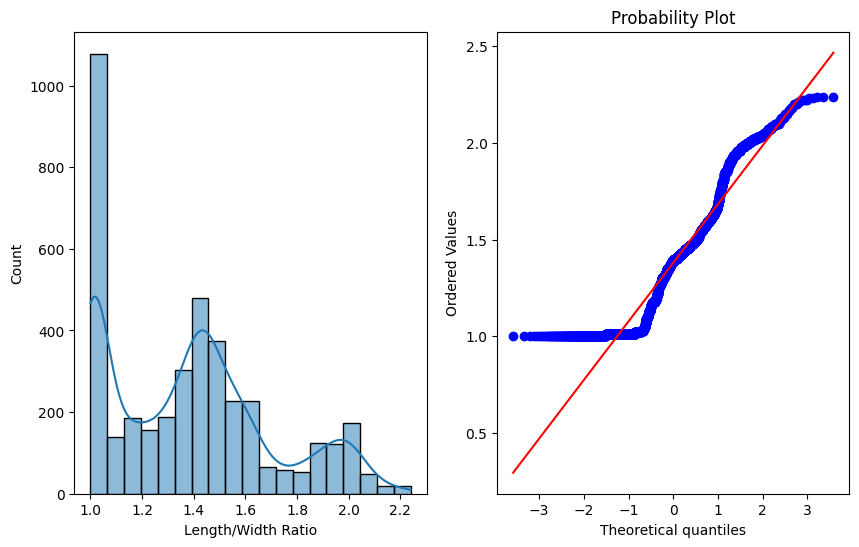

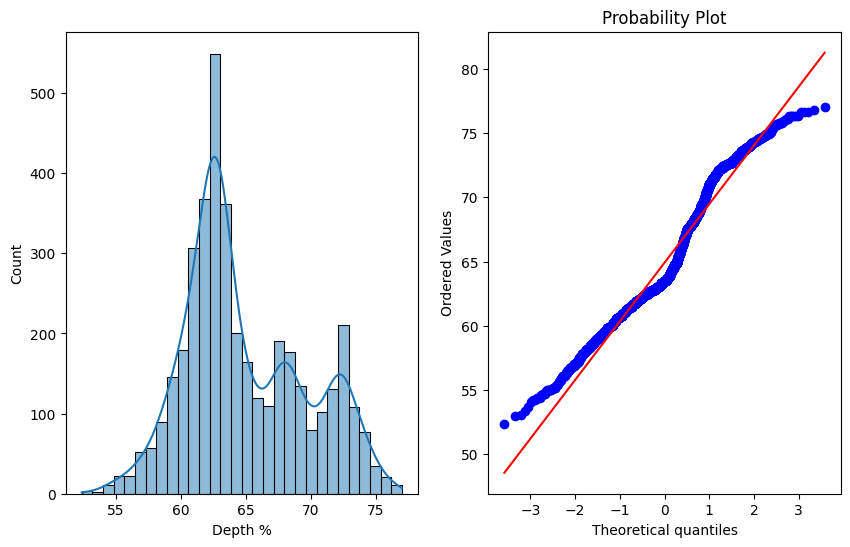

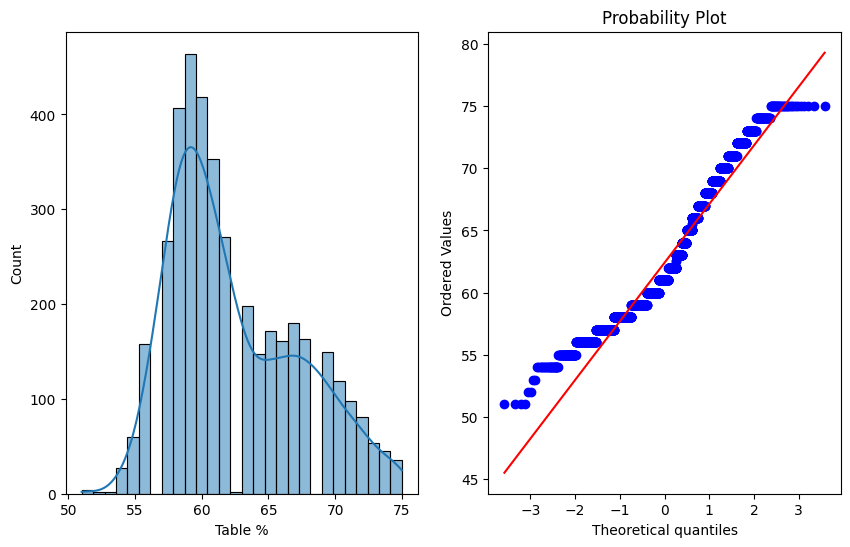

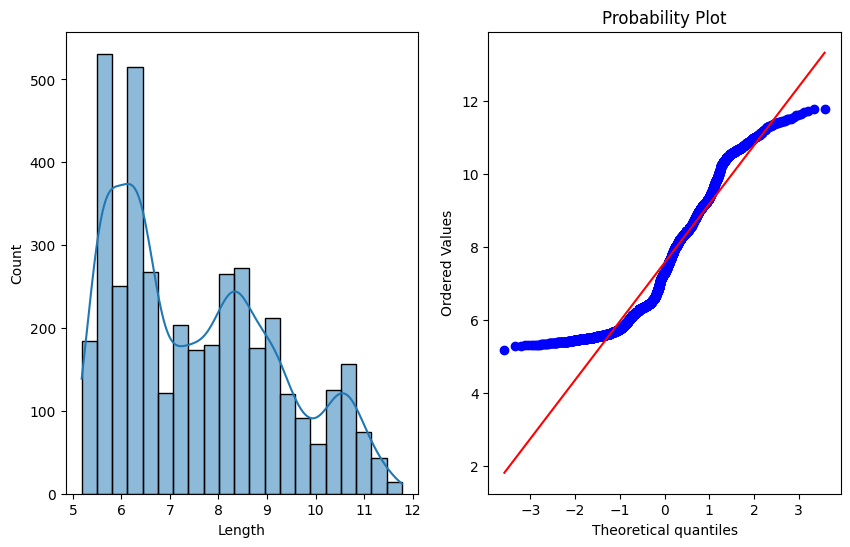

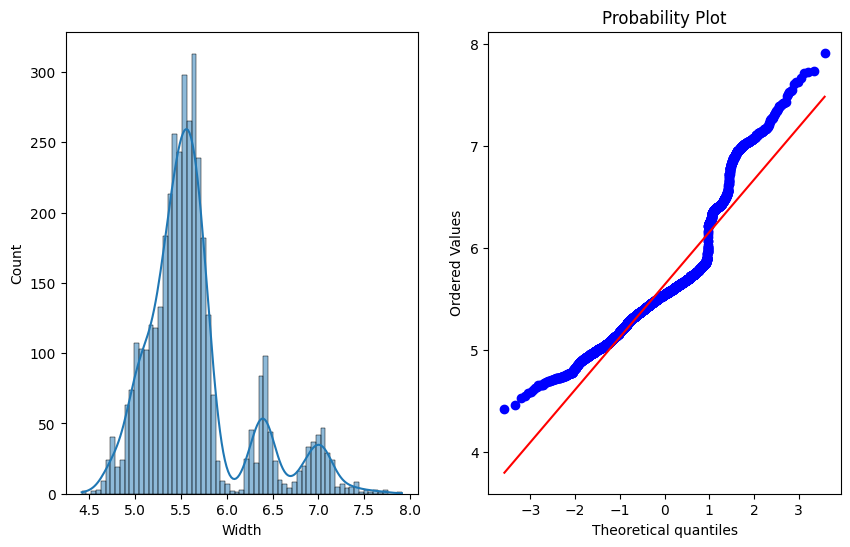

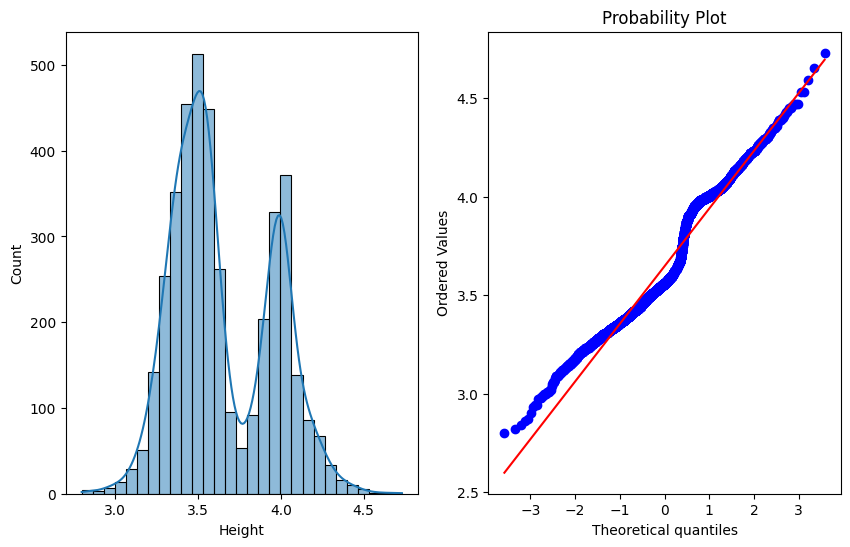

In [910]:
for col in num_cols[-2::-1]:
  skew(x_train,col)

In [911]:
x_train.describe()

Color      Clarity  Carat Weight  Length/Width Ratio  \
count  4037.000000  4037.000000   4037.000000         4037.000000   
mean      1.805053     3.877384      1.041476            1.380753   
std       1.469678     0.957768      0.059859            0.316047   
min       0.000000     0.000000      1.000000            1.000000   
25%       1.000000     3.000000      1.000000            1.030000   
50%       1.000000     4.000000      1.010000            1.390000   
75%       3.000000     5.000000      1.060000            1.560000   
max       4.000000     5.000000      1.370000            2.240000   

           Depth %      Table %       Polish     Symmetry       Length  \
count  4037.000000  4037.000000  4037.000000  4037.000000  4037.000000   
mean     64.909413    62.400297     1.902650     1.633887     7.561808   
std       4.660429     4.858149     0.313529     0.526993     1.665636   
min      52.400000    51.000000     0.000000     0.000000     5.180000   
25%      61.700000    59.000000     2.000000     1.000000     6.160000   
50%      63.500000    61.000000     2.000000     2.000000     7.290000   
75%      68.300000    66.000000     2.000000     2.000000     8.750000   
max      77.000000    75.000000     2.000000     2.000000    11.780000   

             Width       Height        Heart     Marquise         Oval  \
count  4037.000000  4037.000000  4037.000000  4037.000000  4037.000000   
mean      5.639460     3.646428     0.075303     0.139212     0.165469   
std       0.545122     0.300300     0.263913     0.346211     0.371650   
min       4.420000     2.800000     0.000000     0.000000     0.000000   
25%       5.320000     3.420000     0.000000     0.000000     0.000000   
50%       5.550000     3.560000     0.000000     0.000000     0.000000   
75%       5.740000     3.950000     0.000000     0.000000     0.000000   
max       7.910000     4.730000     1.000000     1.000000     1.000000   

              Pear     Princess      Radiant        Round  other_shapes  \
count  4037.000000  4037.000000  4037.000000  4037.000000   4037.000000   
mean      0.164231     0.159029     0.156800     0.087689      0.052267   
std       0.370531     0.365748     0.363657     0.282877      0.222592   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     0.000000      0.000000   
50%       0.000000     0.000000     0.000000     0.000000      0.000000   
75%       0.000000     0.000000     0.000000     0.000000      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       Girdle_Medium  Girdle_Medium to Slightly Thick  Girdle_Medium to Thick  \
count    4037.000000                      4037.000000             4037.000000   
mean        0.074313                         0.252415                0.098093   
std         0.262311                         0.434452                0.297477   
min         0.000000                         0.000000                0.000000   
25%         0.000000                         0.000000                0.000000   
50%         0.000000                         0.000000                0.000000   
75%         0.000000                         1.000000                0.000000   
max         1.000000                         1.000000                1.000000   

       Girdle_Medium to Very Thick  Girdle_Slightly Thick  \
count                  4037.000000            4037.000000   
mean                      0.033936               0.040624   
std                       0.181087               0.197443   
min                       0.000000               0.000000   
25%                       0.000000               0.000000   
50%                       0.000000               0.000000   
75%                       0.000000               0.000000   
max                       1.000000               1.000000   

       Girdle_Slightly Thick to Thick  Girdle_Slightly Thick to Very Thick  \
count                  

<Axes: xlabel='Carat Weight', ylabel='Density'>

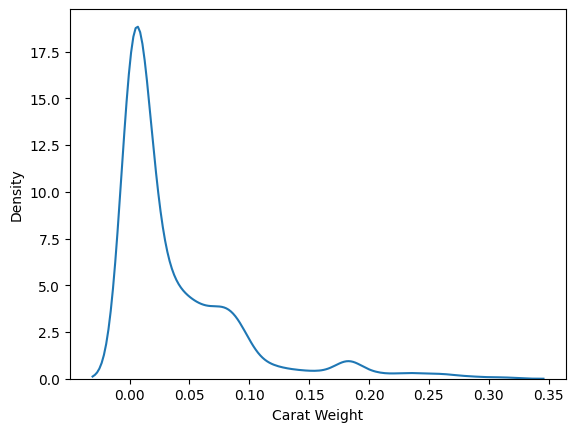

In [912]:
x_train['Carat Weight']=np.log(x_train['Carat Weight'])
x_test['Carat Weight']=np.log(x_test['Carat Weight'])
sns.kdeplot(x_train['Carat Weight'])

In [913]:
x_train.describe()

Color      Clarity  Carat Weight  Length/Width Ratio  \
count  4037.000000  4037.000000   4037.000000         4037.000000   
mean      1.805053     3.877384      0.039117            1.380753   
std       1.469678     0.957768      0.054094            0.316047   
min       0.000000     0.000000      0.000000            1.000000   
25%       1.000000     3.000000      0.000000            1.030000   
50%       1.000000     4.000000      0.009950            1.390000   
75%       3.000000     5.000000      0.058269            1.560000   
max       4.000000     5.000000      0.314811            2.240000   

           Depth %      Table %       Polish     Symmetry       Length  \
count  4037.000000  4037.000000  4037.000000  4037.000000  4037.000000   
mean     64.909413    62.400297     1.902650     1.633887     7.561808   
std       4.660429     4.858149     0.313529     0.526993     1.665636   
min      52.400000    51.000000     0.000000     0.000000     5.180000   
25%      61.700000    59.000000     2.000000     1.000000     6.160000   
50%      63.500000    61.000000     2.000000     2.000000     7.290000   
75%      68.300000    66.000000     2.000000     2.000000     8.750000   
max      77.000000    75.000000     2.000000     2.000000    11.780000   

             Width       Height        Heart     Marquise         Oval  \
count  4037.000000  4037.000000  4037.000000  4037.000000  4037.000000   
mean      5.639460     3.646428     0.075303     0.139212     0.165469   
std       0.545122     0.300300     0.263913     0.346211     0.371650   
min       4.420000     2.800000     0.000000     0.000000     0.000000   
25%       5.320000     3.420000     0.000000     0.000000     0.000000   
50%       5.550000     3.560000     0.000000     0.000000     0.000000   
75%       5.740000     3.950000     0.000000     0.000000     0.000000   
max       7.910000     4.730000     1.000000     1.000000     1.000000   

              Pear     Princess      Radiant        Round  other_shapes  \
count  4037.000000  4037.000000  4037.000000  4037.000000   4037.000000   
mean      0.164231     0.159029     0.156800     0.087689      0.052267   
std       0.370531     0.365748     0.363657     0.282877      0.222592   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     0.000000      0.000000   
50%       0.000000     0.000000     0.000000     0.000000      0.000000   
75%       0.000000     0.000000     0.000000     0.000000      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       Girdle_Medium  Girdle_Medium to Slightly Thick  Girdle_Medium to Thick  \
count    4037.000000                      4037.000000             4037.000000   
mean        0.074313                         0.252415                0.098093   
std         0.262311                         0.434452                0.297477   
min         0.000000                         0.000000                0.000000   
25%         0.000000                         0.000000                0.000000   
50%         0.000000                         0.000000                0.000000   
75%         0.000000                         1.000000                0.000000   
max         1.000000                         1.000000                1.000000   

       Girdle_Medium to Very Thick  Girdle_Slightly Thick  \
count                  4037.000000            4037.000000   
mean                      0.033936               0.040624   
std                       0.181087               0.197443   
min                       0.000000               0.000000   
25%                       0.000000               0.000000   
50%                       0.000000               0.000000   
75%                       0.000000               0.000000   
max                       1.000000               1.000000   

       Girdle_Slightly Thick to Thick  Girdle_Slightly Thick to Very Thick  \
count                  

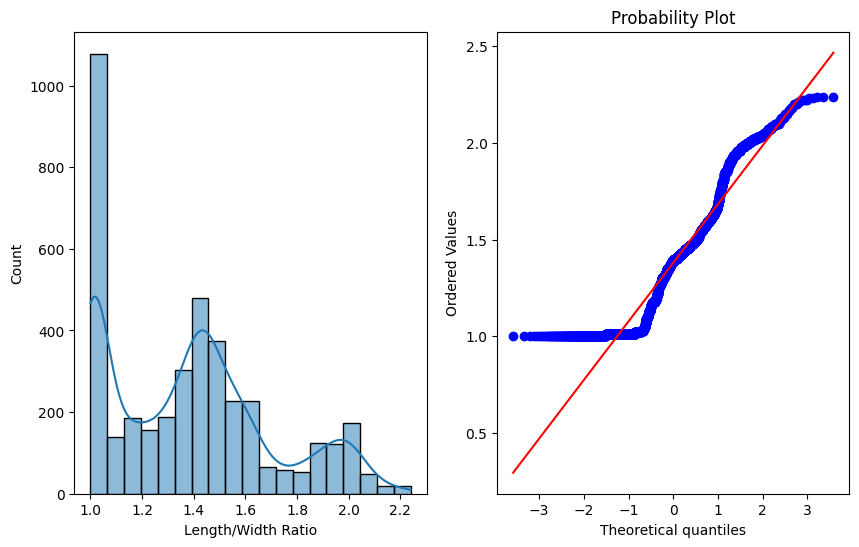

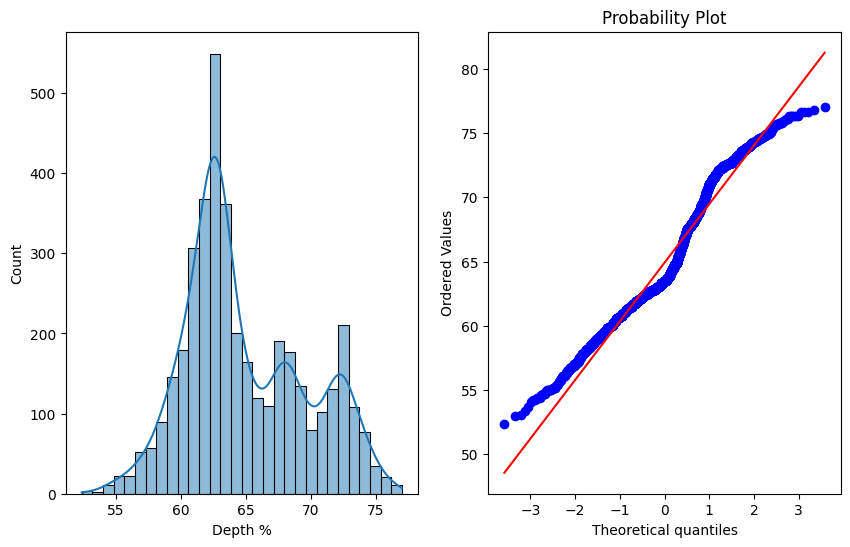

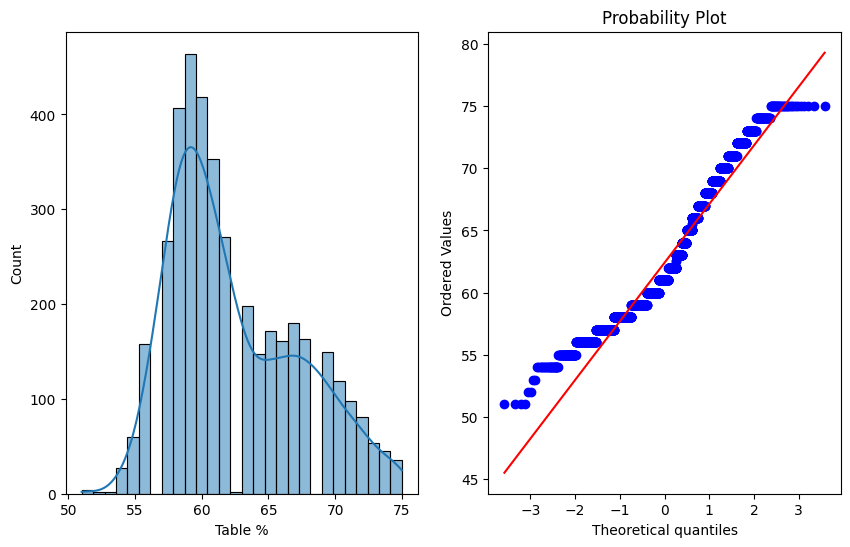

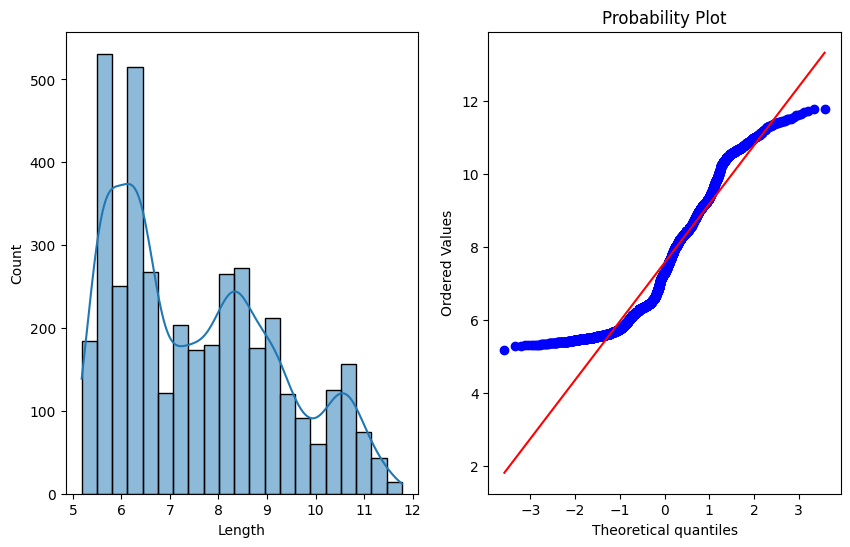

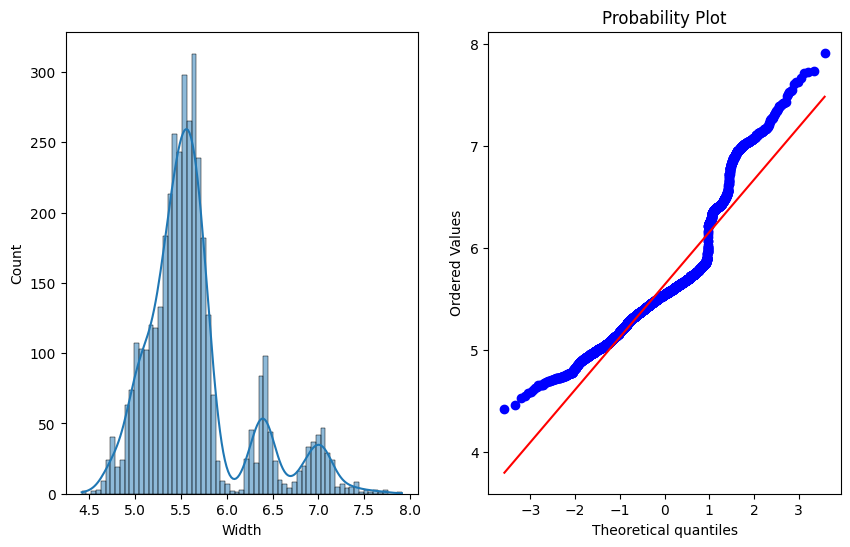

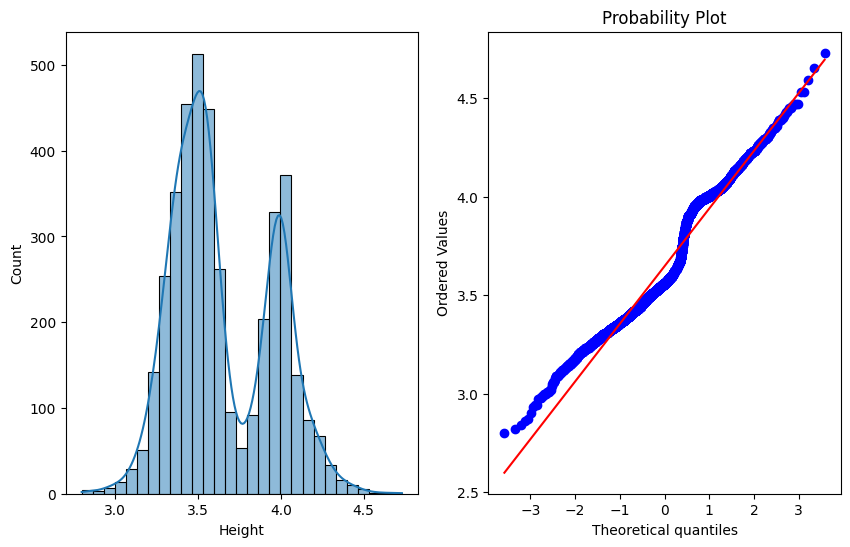

In [914]:
for col in num_cols[-2::-1]:
  skew(x_train,col)

# Standardization


In [915]:
x_train.describe()

Color      Clarity  Carat Weight  Length/Width Ratio  \
count  4037.000000  4037.000000   4037.000000         4037.000000   
mean      1.805053     3.877384      0.039117            1.380753   
std       1.469678     0.957768      0.054094            0.316047   
min       0.000000     0.000000      0.000000            1.000000   
25%       1.000000     3.000000      0.000000            1.030000   
50%       1.000000     4.000000      0.009950            1.390000   
75%       3.000000     5.000000      0.058269            1.560000   
max       4.000000     5.000000      0.314811            2.240000   

           Depth %      Table %       Polish     Symmetry       Length  \
count  4037.000000  4037.000000  4037.000000  4037.000000  4037.000000   
mean     64.909413    62.400297     1.902650     1.633887     7.561808   
std       4.660429     4.858149     0.313529     0.526993     1.665636   
min      52.400000    51.000000     0.000000     0.000000     5.180000   
25%      61.700000    59.000000     2.000000     1.000000     6.160000   
50%      63.500000    61.000000     2.000000     2.000000     7.290000   
75%      68.300000    66.000000     2.000000     2.000000     8.750000   
max      77.000000    75.000000     2.000000     2.000000    11.780000   

             Width       Height        Heart     Marquise         Oval  \
count  4037.000000  4037.000000  4037.000000  4037.000000  4037.000000   
mean      5.639460     3.646428     0.075303     0.139212     0.165469   
std       0.545122     0.300300     0.263913     0.346211     0.371650   
min       4.420000     2.800000     0.000000     0.000000     0.000000   
25%       5.320000     3.420000     0.000000     0.000000     0.000000   
50%       5.550000     3.560000     0.000000     0.000000     0.000000   
75%       5.740000     3.950000     0.000000     0.000000     0.000000   
max       7.910000     4.730000     1.000000     1.000000     1.000000   

              Pear     Princess      Radiant        Round  other_shapes  \
count  4037.000000  4037.000000  4037.000000  4037.000000   4037.000000   
mean      0.164231     0.159029     0.156800     0.087689      0.052267   
std       0.370531     0.365748     0.363657     0.282877      0.222592   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     0.000000      0.000000   
50%       0.000000     0.000000     0.000000     0.000000      0.000000   
75%       0.000000     0.000000     0.000000     0.000000      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       Girdle_Medium  Girdle_Medium to Slightly Thick  Girdle_Medium to Thick  \
count    4037.000000                      4037.000000             4037.000000   
mean        0.074313                         0.252415                0.098093   
std         0.262311                         0.434452                0.297477   
min         0.000000                         0.000000                0.000000   
25%         0.000000                         0.000000                0.000000   
50%         0.000000                         0.000000                0.000000   
75%         0.000000                         1.000000                0.000000   
max         1.000000                         1.000000                1.000000   

       Girdle_Medium to Very Thick  Girdle_Slightly Thick  \
count                  4037.000000            4037.000000   
mean                      0.033936               0.040624   
std                       0.181087               0.197443   
min                       0.000000               0.000000   
25%                       0.000000               0.000000   
50%                       0.000000               0.000000   
75%                       0.000000               0.000000   
max                       1.000000               1.000000   

       Girdle_Slightly Thick to Thick  Girdle_Slightly Thick to Very Thick  \
count                  

In [916]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [917]:
num_cols=num_cols[-2::-1]

In [918]:
temp_train=pd.DataFrame(scaler.fit_transform(x_train[num_cols]),columns=num_cols)
temp_test=pd.DataFrame(scaler.transform(x_test[num_cols]),columns=num_cols)
temp_train.index=x_train.index
temp_test.index=x_test.index
temp_train


Length/Width Ratio   Depth %   Table %    Length     Width    Height
1825            0.056452  0.691057  0.458333  0.086364  0.272206  0.476684
5279            0.362903  0.430894  0.333333  0.466667  0.369628  0.414508
4693            0.169355  0.829268  0.208333  0.154545  0.206304  0.487047
5890            0.008065  0.869919  0.583333  0.019697  0.246418  0.564767
5653            0.241935  0.548780  0.666667  0.216667  0.186246  0.279793
...                  ...       ...       ...       ...       ...       ...
4374            0.177419  0.422764  0.750000  0.168182  0.212034  0.227979
439             0.290323  0.662602  0.791667  0.203030  0.103152  0.248705
1626            0.370968  0.410569  0.333333  0.503030  0.406877  0.440415
2667            0.379032  0.386179  0.458333  0.498485  0.389685  0.404145
4041            0.217742  0.747967  0.666667  0.184848  0.177650  0.398964

[4037 rows x 6 columns]

In [919]:
x_train.drop(num_cols,axis=1,inplace=True)
x_test.drop(num_cols,axis=1,inplace=True)

In [920]:
x_train=pd.concat([x_train,temp_train],axis=1)
x_test=pd.concat([x_test,temp_test],axis=1)
x_train

Color  Clarity  Carat Weight  Polish  Symmetry  Heart  Marquise  Oval  \
1825    4.0      5.0      0.000000     2.0       2.0      0         0     0   
5279    1.0      4.0      0.058269     2.0       2.0      0         0     1   
4693    1.0      5.0      0.009950     2.0       1.0      0         0     0   
5890    3.0      4.0      0.000000     2.0       1.0      0         0     0   
5653    3.0      4.0      0.009950     2.0       2.0      0         0     0   
...     ...      ...           ...     ...       ...    ...       ...   ...   
4374    1.0      5.0      0.009950     1.0       0.0      0         0     0   
439     3.0      5.0      0.009950     2.0       2.0      0         0     0   
1626    1.0      4.0      0.095310     2.0       2.0      0         0     1   
2667    1.0      4.0      0.076961     2.0       2.0      0         0     1   
4041    1.0      4.0      0.000000     2.0       1.0      0         0     0   

      Pear  Princess  Radiant  Round  other_shapes  Girdle_Medium  \
1825     0         0        0      0             1            0.0   
5279     0         0        0      0             0            0.0   
4693     0         0        0      0             1            0.0   
5890     0         1        0      0             0            0.0   
5653     0         0        1      0             0            0.0   
...    ...       ...      ...    ...           ...            ...   
4374     0         0        1      0             0            0.0   
439      0         0        0      0             1            0.0   
1626     0         0        0      0             0            0.0   
2667     0         0        0      0             0            0.0   
4041     0         0        1      0             0            0.0   

      Girdle_Medium to Slightly Thick  Girdle_Medium to Thick  \
1825                              0.0                     0.0   
5279                              0.0                     0.0   
4693                              0.0                     0.0   
5890                              0.0                     0.0   
5653                              1.0                     0.0   
...                               ...                     ...   
4374                              0.0                     0.0   
439                               0.0                     0.0   
1626                              0.0                     0.0   
2667                              1.0                     0.0   
4041                              0.0                     0.0   

      Girdle_Medium to Very Thick  Girdle_Slightly Thick  \
1825                          0.0                    0.0   
5279                          0.0                    1.0   
4693                          0.0                    0.0   
5890                          0.0                    0.0   
5653                          0.0                    0.0   
...                           ...                    ...   
4374                          1.0                    0.0   
439                           0.0                    0.0   
1626                          0.0                    0.0   
2667                          0.0                    0.0   
4041                          0.0                    0.0   

      Girdle_Slightly Thick to Thick  Girdle_Slightly Thick to Very Thick  \
1825                             1.0                                  0.0   
5279                             0.0                                  0.0   
4693                             0.0                                  1.0   
5890                             0.0                                  0.0   
5653                             0.0                                  0.0   
...                              ...                                  ...   
4374                             0.0                                  0.0   
439                              0.0                                  0.0   
1626                             

# Correlation

In [921]:
x_train

Color  Clarity  Carat Weight  Polish  Symmetry  Heart  Marquise  Oval  \
1825    4.0      5.0      0.000000     2.0       2.0      0         0     0   
5279    1.0      4.0      0.058269     2.0       2.0      0         0     1   
4693    1.0      5.0      0.009950     2.0       1.0      0         0     0   
5890    3.0      4.0      0.000000     2.0       1.0      0         0     0   
5653    3.0      4.0      0.009950     2.0       2.0      0         0     0   
...     ...      ...           ...     ...       ...    ...       ...   ...   
4374    1.0      5.0      0.009950     1.0       0.0      0         0     0   
439     3.0      5.0      0.009950     2.0       2.0      0         0     0   
1626    1.0      4.0      0.095310     2.0       2.0      0         0     1   
2667    1.0      4.0      0.076961     2.0       2.0      0         0     1   
4041    1.0      4.0      0.000000     2.0       1.0      0         0     0   

      Pear  Princess  Radiant  Round  other_shapes  Girdle_Medium  \
1825     0         0        0      0             1            0.0   
5279     0         0        0      0             0            0.0   
4693     0         0        0      0             1            0.0   
5890     0         1        0      0             0            0.0   
5653     0         0        1      0             0            0.0   
...    ...       ...      ...    ...           ...            ...   
4374     0         0        1      0             0            0.0   
439      0         0        0      0             1            0.0   
1626     0         0        0      0             0            0.0   
2667     0         0        0      0             0            0.0   
4041     0         0        1      0             0            0.0   

      Girdle_Medium to Slightly Thick  Girdle_Medium to Thick  \
1825                              0.0                     0.0   
5279                              0.0                     0.0   
4693                              0.0                     0.0   
5890                              0.0                     0.0   
5653                              1.0                     0.0   
...                               ...                     ...   
4374                              0.0                     0.0   
439                               0.0                     0.0   
1626                              0.0                     0.0   
2667                              1.0                     0.0   
4041                              0.0                     0.0   

      Girdle_Medium to Very Thick  Girdle_Slightly Thick  \
1825                          0.0                    0.0   
5279                          0.0                    1.0   
4693                          0.0                    0.0   
5890                          0.0                    0.0   
5653                          0.0                    0.0   
...                           ...                    ...   
4374                          1.0                    0.0   
439                           0.0                    0.0   
1626                          0.0                    0.0   
2667                          0.0                    0.0   
4041                          0.0                    0.0   

      Girdle_Slightly Thick to Thick  Girdle_Slightly Thick to Very Thick  \
1825                             1.0                                  0.0   
5279                             0.0                                  0.0   
4693                             0.0                                  1.0   
5890                             0.0                                  0.0   
5653                             0.0                                  0.0   
...                              ...                                  ...   
4374                             0.0                                  0.0   
439                              0.0                                  0.0   
1626                             

In [922]:
x_train[num_cols].corr()

Length/Width Ratio   Depth %   Table %    Length  \
Length/Width Ratio            1.000000 -0.454041 -0.422226  0.962761   
Depth %                      -0.454041  1.000000  0.720258 -0.558407   
Table %                      -0.422226  0.720258  1.000000 -0.520882   
Length                        0.962761 -0.558407 -0.520882  1.000000   
Width                        -0.368124 -0.510199 -0.384502 -0.233695   
Height                       -0.788815  0.282426  0.177305 -0.719350   

                       Width    Height  
Length/Width Ratio -0.368124 -0.788815  
Depth %            -0.510199  0.282426  
Table %            -0.384502  0.177305  
Length             -0.233695 -0.719350  
Width               1.000000  0.678436  
Height              0.678436  1.000000

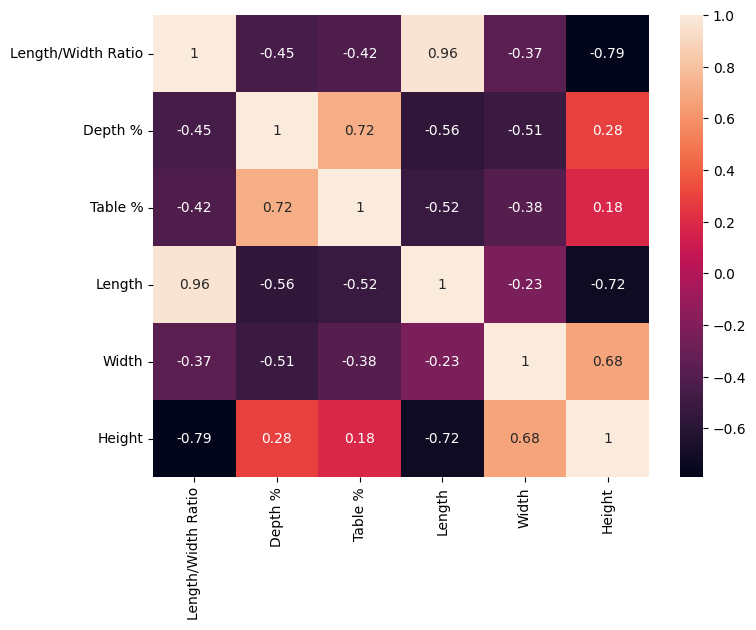

In [923]:
plt.figure(figsize=(8,6))
sns.heatmap(x_train[num_cols].corr(),annot=True)
plt.show()

In [924]:
def correlations(data):
  matrix=data.corr()
  cols=set()
  for i in range(len(matrix.columns)):
    for j in range(i):
      if abs(matrix.iloc[i,j])>0.75:
        cols.add(matrix.columns[i])
  return cols

In [925]:
drop=correlations(x_train[num_cols])
drop

{'Height', 'Length'}

In [926]:
x_train.drop(drop,axis=1,inplace=True)
x_test.drop(drop,axis=1,inplace=True)
x_train

Color  Clarity  Carat Weight  Polish  Symmetry  Heart  Marquise  Oval  \
1825    4.0      5.0      0.000000     2.0       2.0      0         0     0   
5279    1.0      4.0      0.058269     2.0       2.0      0         0     1   
4693    1.0      5.0      0.009950     2.0       1.0      0         0     0   
5890    3.0      4.0      0.000000     2.0       1.0      0         0     0   
5653    3.0      4.0      0.009950     2.0       2.0      0         0     0   
...     ...      ...           ...     ...       ...    ...       ...   ...   
4374    1.0      5.0      0.009950     1.0       0.0      0         0     0   
439     3.0      5.0      0.009950     2.0       2.0      0         0     0   
1626    1.0      4.0      0.095310     2.0       2.0      0         0     1   
2667    1.0      4.0      0.076961     2.0       2.0      0         0     1   
4041    1.0      4.0      0.000000     2.0       1.0      0         0     0   

      Pear  Princess  Radiant  Round  other_shapes  Girdle_Medium  \
1825     0         0        0      0             1            0.0   
5279     0         0        0      0             0            0.0   
4693     0         0        0      0             1            0.0   
5890     0         1        0      0             0            0.0   
5653     0         0        1      0             0            0.0   
...    ...       ...      ...    ...           ...            ...   
4374     0         0        1      0             0            0.0   
439      0         0        0      0             1            0.0   
1626     0         0        0      0             0            0.0   
2667     0         0        0      0             0            0.0   
4041     0         0        1      0             0            0.0   

      Girdle_Medium to Slightly Thick  Girdle_Medium to Thick  \
1825                              0.0                     0.0   
5279                              0.0                     0.0   
4693                              0.0                     0.0   
5890                              0.0                     0.0   
5653                              1.0                     0.0   
...                               ...                     ...   
4374                              0.0                     0.0   
439                               0.0                     0.0   
1626                              0.0                     0.0   
2667                              1.0                     0.0   
4041                              0.0                     0.0   

      Girdle_Medium to Very Thick  Girdle_Slightly Thick  \
1825                          0.0                    0.0   
5279                          0.0                    1.0   
4693                          0.0                    0.0   
5890                          0.0                    0.0   
5653                          0.0                    0.0   
...                           ...                    ...   
4374                          1.0                    0.0   
439                           0.0                    0.0   
1626                          0.0                    0.0   
2667                          0.0                    0.0   
4041                          0.0                    0.0   

      Girdle_Slightly Thick to Thick  Girdle_Slightly Thick to Very Thick  \
1825                             1.0                                  0.0   
5279                             0.0                                  0.0   
4693                             0.0                                  1.0   
5890                             0.0                                  0.0   
5653                             0.0                                  0.0   
...                              ...                                  ...   
4374                             0.0                                  0.0   
439                              0.0                                  0.0   
1626                             

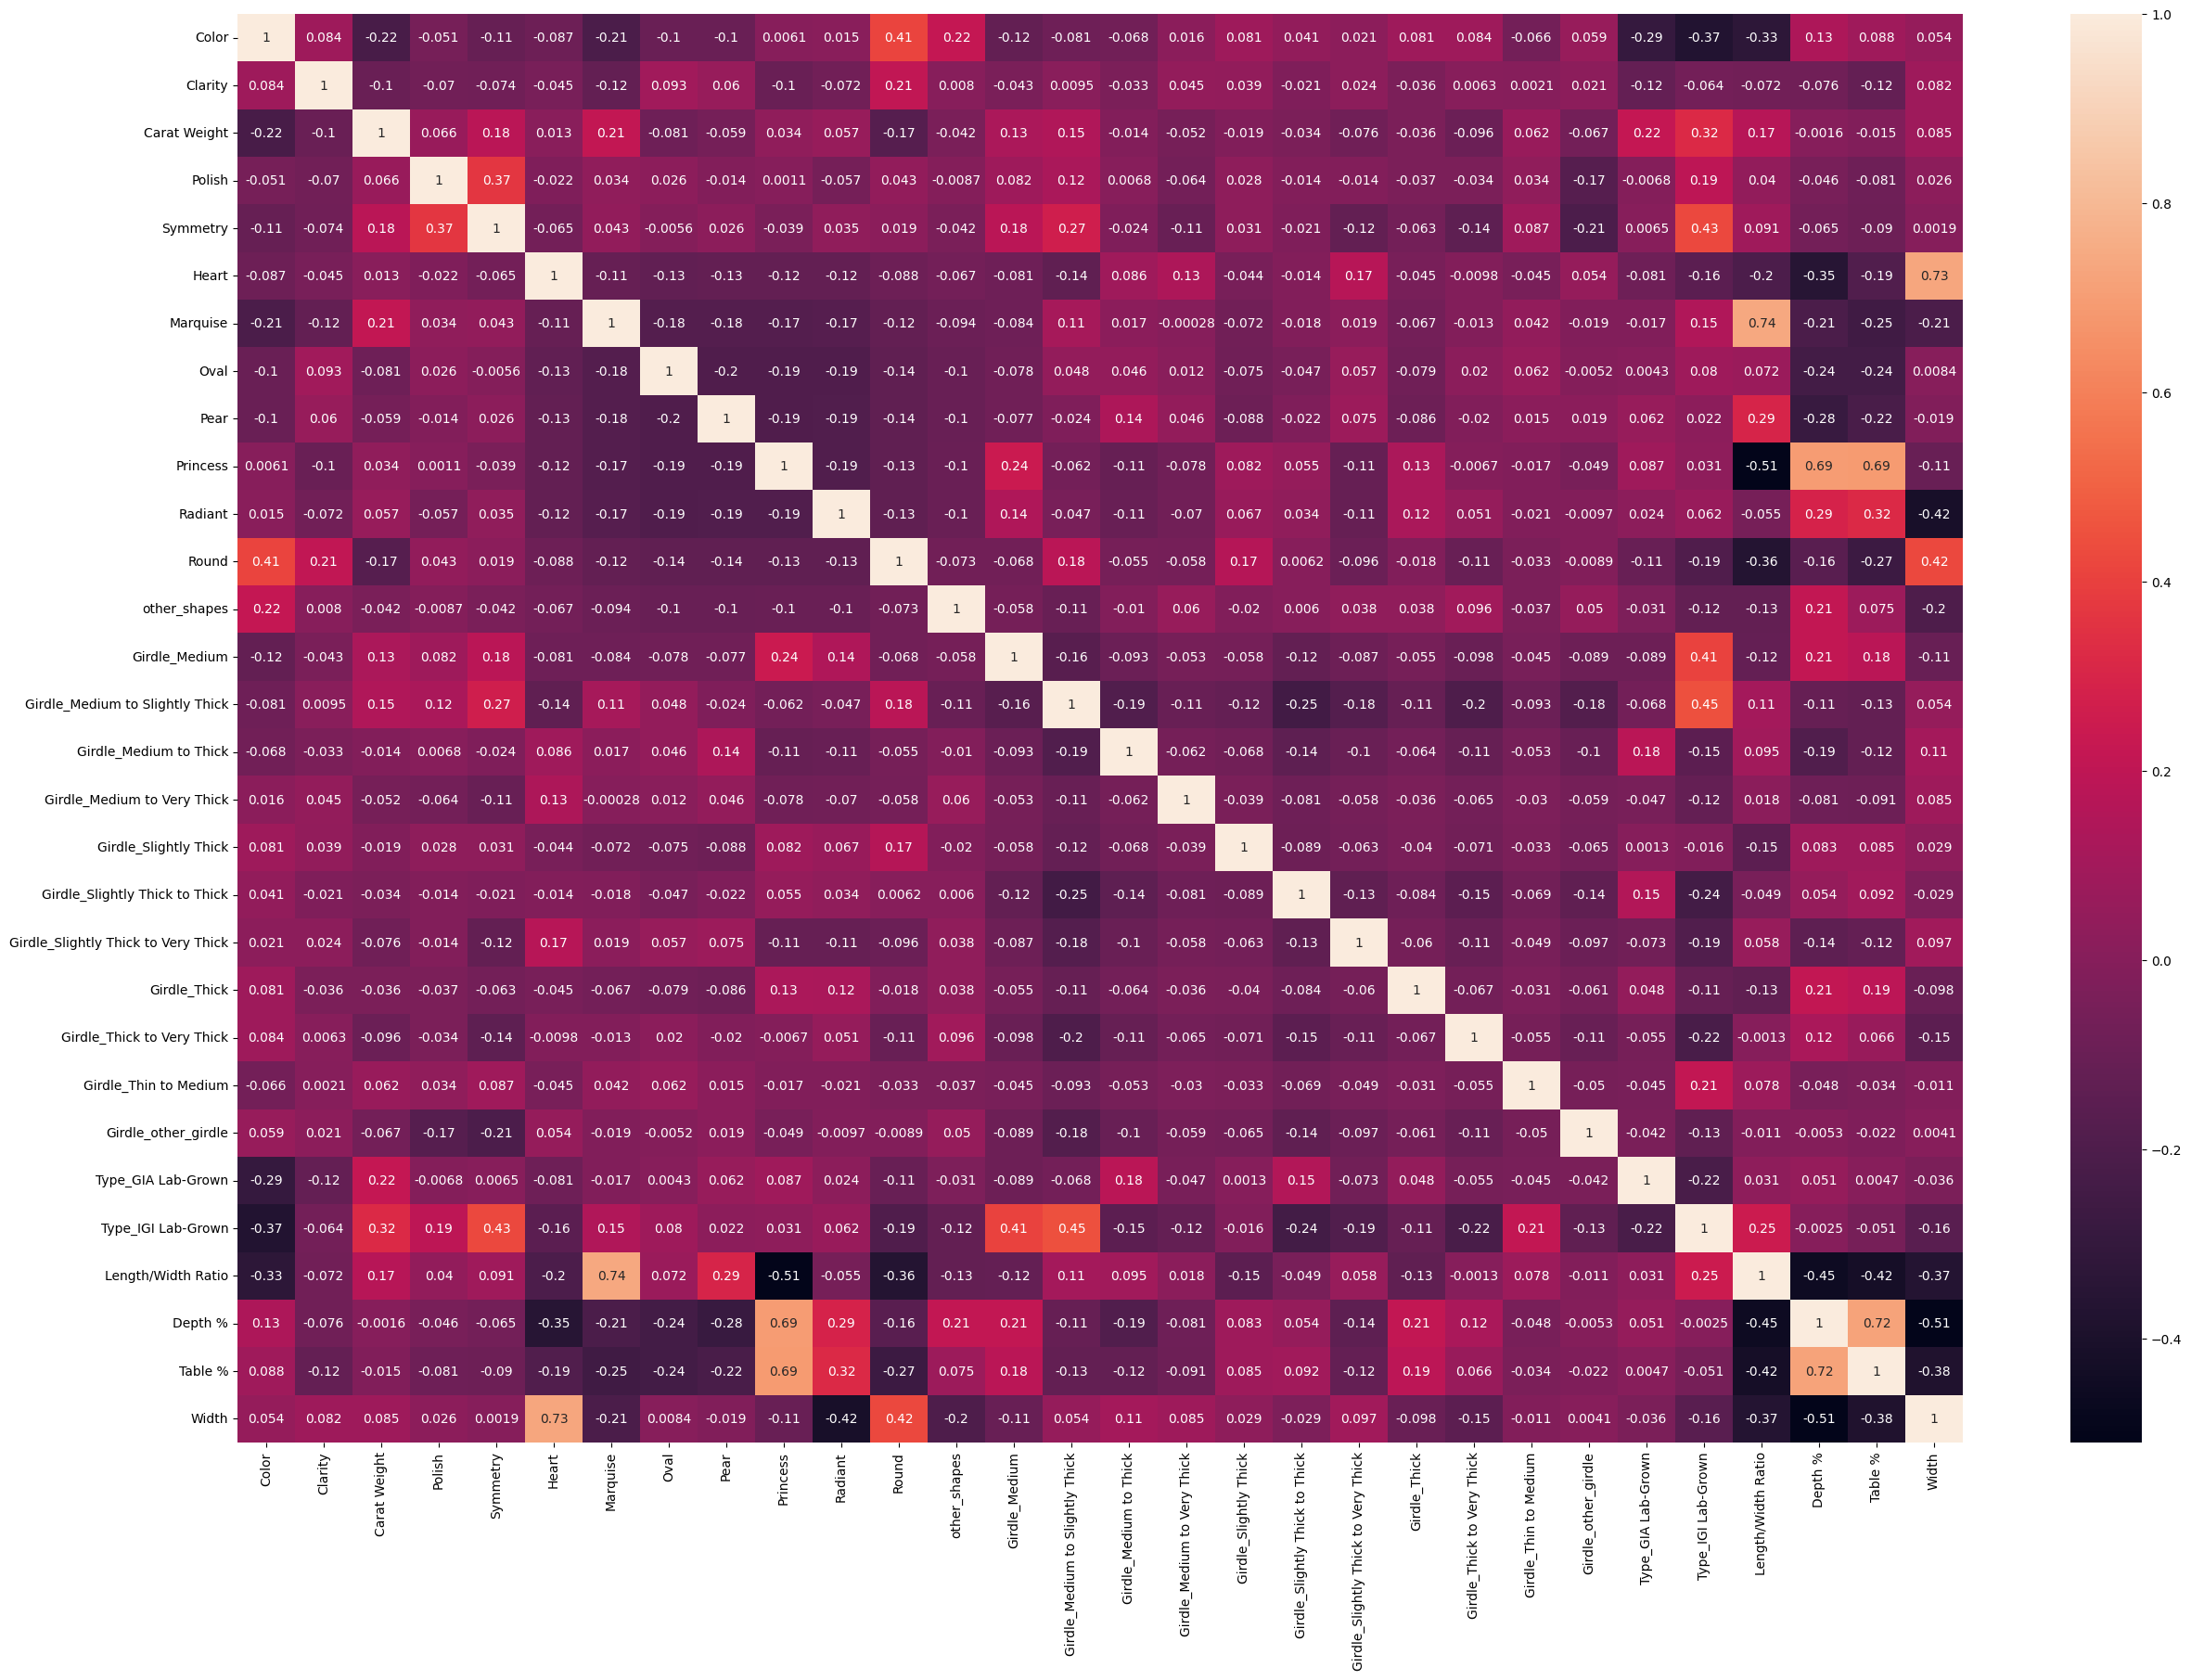

In [927]:
plt.figure(figsize=(30,20))
sns.heatmap(x_train.corr(),annot=True)
plt.show()

In [928]:
from sklearn.feature_selection import mutual_info_regression
mi_reg=mutual_info_regression(x_train,y_train)
mi_reg

array([0.37451499, 0.35876442, 0.50285632, 0.02868517, 0.09903387,
       0.05730166, 0.15330776, 0.108013  , 0.05258217, 0.09042742,
       0.03646796, 0.12612217, 0.11856154, 0.08446832, 0.09316429,
       0.02336325, 0.00475316, 0.01372943, 0.01836417, 0.04543547,
       0.01034665, 0.04906406, 0.01684124, 0.0141153 , 0.12435412,
       0.36098693, 0.52134581, 0.23818593, 0.18111217, 0.39072926])

In [929]:
mi_reg=pd.Series(mi_reg)
mi_reg.index=x_train.columns
mi_reg

Color                                  0.374515
Clarity                                0.358764
Carat Weight                           0.502856
Polish                                 0.028685
Symmetry                               0.099034
Heart                                  0.057302
Marquise                               0.153308
Oval                                   0.108013
Pear                                   0.052582
Princess                               0.090427
Radiant                                0.036468
Round                                  0.126122
other_shapes                           0.118562
Girdle_Medium                          0.084468
Girdle_Medium to Slightly Thick        0.093164
Girdle_Medium to Thick                 0.023363
Girdle_Medium to Very Thick            0.004753
Girdle_Slightly Thick                  0.013729
Girdle_Slightly Thick to Thick         0.018364
Girdle_Slightly Thick to Very Thick    0.045435
Girdle_Thick                           0.010347
Girdle_Thick to Very Thick             0.049064
Girdle_Thin to Medium                  0.016841
Girdle_other_girdle                    0.014115
Type_GIA Lab-Grown                     0.124354
Type_IGI Lab-Grown                     0.360987
Length/Width Ratio                     0.521346
Depth %                                0.238186
Table %                                0.181112
Width                                  0.390729
dtype: float64

In [930]:
mi_reg.sort_values(ascending=False)

Length/Width Ratio                     0.521346
Carat Weight                           0.502856
Width                                  0.390729
Color                                  0.374515
Type_IGI Lab-Grown                     0.360987
Clarity                                0.358764
Depth %                                0.238186
Table %                                0.181112
Marquise                               0.153308
Round                                  0.126122
Type_GIA Lab-Grown                     0.124354
other_shapes                           0.118562
Oval                                   0.108013
Symmetry                               0.099034
Girdle_Medium to Slightly Thick        0.093164
Princess                               0.090427
Girdle_Medium                          0.084468
Heart                                  0.057302
Pear                                   0.052582
Girdle_Thick to Very Thick             0.049064
Girdle_Slightly Thick to Very Thick    0.045435
Radiant                                0.036468
Polish                                 0.028685
Girdle_Medium to Thick                 0.023363
Girdle_Slightly Thick to Thick         0.018364
Girdle_Thin to Medium                  0.016841
Girdle_other_girdle                    0.014115
Girdle_Slightly Thick                  0.013729
Girdle_Thick                           0.010347
Girdle_Medium to Very Thick            0.004753
dtype: float64

# Evaluation using Model Training

In [931]:
x_train.columns

Index(['Color', 'Clarity', 'Carat Weight', 'Polish', 'Symmetry', 'Heart',
       'Marquise', 'Oval', 'Pear', 'Princess', 'Radiant', 'Round',
       'other_shapes', 'Girdle_Medium', 'Girdle_Medium to Slightly Thick',
       'Girdle_Medium to Thick', 'Girdle_Medium to Very Thick',
       'Girdle_Slightly Thick', 'Girdle_Slightly Thick to Thick',
       'Girdle_Slightly Thick to Very Thick', 'Girdle_Thick',
       'Girdle_Thick to Very Thick', 'Girdle_Thin to Medium',
       'Girdle_other_girdle', 'Type_GIA Lab-Grown', 'Type_IGI Lab-Grown',
       'Length/Width Ratio', 'Depth %', 'Table %', 'Width'],
      dtype='object')

In [932]:
x_test.columns

Index(['Color', 'Clarity', 'Carat Weight', 'Polish', 'Symmetry', 'Heart',
       'Marquise', 'Oval', 'Pear', 'Princess', 'Radiant', 'Round',
       'other_shapes', 'Girdle_Medium', 'Girdle_Medium to Slightly Thick',
       'Girdle_Medium to Thick', 'Girdle_Medium to Very Thick',
       'Girdle_Slightly Thick', 'Girdle_Slightly Thick to Thick',
       'Girdle_Slightly Thick to Very Thick', 'Girdle_Thick',
       'Girdle_Thick to Very Thick', 'Girdle_Thin to Medium',
       'Girdle_other_girdle', 'Type_GIA Lab-Grown', 'Type_IGI Lab-Grown',
       'Length/Width Ratio', 'Depth %', 'Table %', 'Width'],
      dtype='object')

In [933]:
from sklearn.metrics import r2_score,mean_squared_error

In [934]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [935]:
y_pred1=model1.predict(x_test)
r2_score(y_test,y_pred1)

0.8431402820934449

In [936]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [937]:
y_pred2=model2.predict(x_test)
r2_score(y_test,y_pred2)

0.7467544827549498

In [938]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(x_train,y_train)

RandomForestRegressor()

In [939]:
y_pred3=model3.predict(x_test)
r2_score(y_test,y_pred3)

0.8836453943157672